<a href="https://colab.research.google.com/github/AhamedShimak/Automatic-Trading-Algorithm/blob/main/My_Binance_trading_algrithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect Binance and get sequance Data

In [ ]:
!pip install python-binance

In [ ]:
!pip install python-binance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from datetime import datetime


from binance.client import Client
from binance.enums import *

from IPython.display import clear_output


API_KEY="XqhtOe7lI2KbldSqwM4O3uCa1iqFtQ1d9bLwzpMjkCBRxCJ6Mzaqh1LdsYUvn2St"
SECRET_KEY="a6MvCxHsmkz3SdBZNqLAd3NDnrQG0HVubttj1uh9npmDRum75U6LVZ07DCggzIGU"

client=Client(API_KEY,SECRET_KEY)

In [ ]:
TOKENS=14
T_PRICE=12
WALLET=pd.DataFrame({"buy":[],"quantity":[],"orderUSD":[]})

PROFITS=pd.DataFrame({"buy":[],"sold":[],"profit":[]})
TOTAL_PROFIT=0
PROFITS.iloc()


In [ ]:
symb="IOTXUSDT"
tickSize=float(client.get_symbol_info(symbol=symb).get('filters')[2].get("stepSize"))

In [ ]:
tickSize

1.0

In [ ]:
DATA_SOURCE=pd.read_csv("IOTX_5_sec.csv" )

In [ ]:
#functions
def ema_gen(data,s1,s2):
  shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
  longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
  return(shortEMA,longEMA)

In [ ]:
##########
DATA=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
DATA_TEST=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
(s,l)=(5,8)
##########
######
WALLET_CLEAR=0
######


#functions
def ema_gen(data,s1,s2):
  shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
  longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
  return(shortEMA,longEMA)



for bs in range(0,int(DATA_SOURCE["open"].shape[0])):
  dat=DATA_SOURCE["open"][bs]  
  ######################
  #COIN=client.get_ticker(symbol=symb)
  currentPrice=float(dat)
  #currentQuantity=math.floor((T_PRICE+5-TOKENS)/(currentPrice*tickSize))
  currentQuantity=math.floor((T_PRICE)/(currentPrice*tickSize))  
  #TIME=datetime.fromtimestamp(int(COIN.get('openTime'))/1000).strftime('%Y-%m-%d %H:%M:%S')
  ######################
  #Display dash board
  #print("##################### Current price ",currentPrice,"#######################")
  #print(currentPrice , "going to purchase",currentQuantity*currentPrice*tickSize)
  #print("Available tokens ",TOKENS)
  #print("Pending slots purchased price ")
  #print(WALLET)
  #print("All profitable deals")
  #print(PROFITS)
  #print("Total profit ",TOTAL_PROFIT)
  outStandingLoss=WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice)
  DATA=DATA.append({"open":currentPrice,"wallcount":WALLET.shape[0],"outstandingLoss":outStandingLoss},ignore_index=True)
  #plt.plot(DATA["open"].tail(100))
 # plt.show()

  if DATA["open"].size>21:

    #data=something
    
   
    #pass indicator
    if int(DATA["open"].size)>21:
        
      (sEMA,lEMA)= ema_gen(DATA["open"][-20:],s,l)
      
      if (sEMA.iloc[-2]<lEMA.iloc[-2]) and (sEMA.iloc[-1]>lEMA.iloc[-1]) and TOKENS>0:  ############## BUYING POINT
        #print("buying point####################################################")
        WALLET_CLEAR=0
        if WALLET["buy"].size>0 and (currentPrice<(WALLET["buy"].min())*0.996):
          WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)
             
          #buy binance
          #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
          #buy binance
            

          TOKENS=TOKENS-1
        elif WALLET["buy"].size==0:
          WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)   
           
          #buy binance
          #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
          #buy binance

          TOKENS=TOKENS-1

      elif ((sEMA.iloc[-2]>lEMA.iloc[-2]) and (sEMA.iloc[-1]<lEMA.iloc[-1])) :   ############ SELLING POINT
        #print("selling_point######################################################################################################++++++++++++++++")
        WALLET_CLEAR=1
        dropped_index=[]
        ind=0
        for bought in WALLET["buy"]:
          tempProfit=((currentPrice-bought)-((currentPrice +bought)*0.001))*WALLET["quantity"][ind]*tickSize
          if tempProfit>0:
            PROFITS=PROFITS.append({"buy":bought*WALLET["quantity"][ind]*tickSize,"sold":currentPrice*WALLET["quantity"][ind]*tickSize,"profit":tempProfit},ignore_index=True)

            #sell binance
           # client.create_order( symbol=symb,side=SIDE_SELL, type=ORDER_TYPE_MARKET,quantity=WALLET["quantity"][ind])
            #sell binance

            dropped_index.append(ind)
            TOTAL_PROFIT=TOTAL_PROFIT+tempProfit
            TOKENS=TOKENS+1
            print("sell actually")
          ind=ind+1
        if len(dropped_index)>0:
          WALLET=WALLET.drop(WALLET.index[dropped_index])
    
            
          
      

      
      #time.sleep(0.05)
      #clear_output()
  else:
    #print("getting data")
    print(currentPrice)
    #time.sleep(0.5) 
    #clear_output()

0.11282
0.11282
0.11272
0.11269000000000001
0.11269000000000001
0.11267
0.11270999999999999
0.11272
0.11277000000000001
0.11277999999999999
0.11275999999999999
0.11274
0.11274
0.11274
0.11277000000000001
0.11275
0.11277999999999999
0.11277999999999999
0.11277999999999999
0.11277999999999999
0.11275999999999999
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
sell actually
se

In [ ]:
TOTAL_PROFIT

185.5863674350001

In [ ]:
PROFITS

,buy,sold,profit
0,11.97758,12.00540,0.003837
1,11.94090,11.96740,0.002592
2,11.92818,11.97694,0.024855
3,11.97437,12.02894,0.030567
4,11.98828,12.01289,0.000609
...,...,...,...
145,11.92296,11.97184,0.024985
146,11.98970,12.06396,0.050206
147,11.92632,12.00630,0.056047
148,11.97090,12.01790,0.023011


In [ ]:
WALLET

,buy,quantity,orderUSD
0,0.12910,92.0,11.87720
1,0.12835,93.0,11.93655
2,0.12744,94.0,11.97936
3,0.12672,94.0,11.91168
4,0.12604,95.0,11.97380
5,0.12552,95.0,11.92440


## Connect Binance and get sequance Data VERSION 2

In [ ]:
!pip install python-binance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from datetime import datetime


from binance.client import Client
from binance.enums import *

from IPython.display import clear_output


API_KEY="XqhtOe7lI2KbldSqwM4O3uCa1iqFtQ1d9bLwzpMjkCBRxCJ6Mzaqh1LdsYUvn2St"
SECRET_KEY="a6MvCxHsmkz3SdBZNqLAd3NDnrQG0HVubttj1uh9npmDRum75U6LVZ07DCggzIGU"

client=Client(API_KEY,SECRET_KEY)

In [ ]:
TOTAL_VALUE=2400
TV=[]

In [ ]:
symb="IOTXUSDT"
tickSize=float(client.get_symbol_info(symbol=symb).get('filters')[2].get("stepSize"))

In [ ]:
tickSize

1.0

In [ ]:
DATA_SOURCE=pd.read_csv("/content/IOTX_5_sec2.csv" )

In [ ]:
DATA_SOURCE["open"].plot(figsize=(16,12))

In [ ]:
DATA_SOURCE["open"].tail()

16734    0.12628
16735    0.12628
16736    0.12638
16737    0.12639
16738    0.12629
Name: open, dtype: float64

In [ ]:
#functions
def ema_gen(data,s1,s2):
  shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
  longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
  return(shortEMA,longEMA)

In [ ]:
TOKENS=15
TOKENS1=1
Tin=12
Tin1=2

T_PRICE=15
WALLET=pd.DataFrame({"buy":[],"quantity":[],"orderUSD":[]})
WALLET1=pd.DataFrame({"sell":[],"quantity":[],"orderUSD":[]})
PROFITS=pd.DataFrame({"buy":[],"sold":[],"profit":[]})
PROFITS1=pd.DataFrame({"buy":[],"sold":[],"profit":[]})
TOTAL_PROFIT=0
TOTAL_PROFIT1=0
PROFITS.iloc()

TOK=[]
TOK1=[]


In [ ]:
deals1=[]
deals=[]


In [ ]:
##########
DATA=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
DATA_TEST=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
(s,l)=(5,8)
##########
######
WALLET_CLEAR=0
######


#functions
def ema_gen(data,s1,s2):
  shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
  longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
  return(shortEMA,longEMA)



for bs in range(0,DATA_SOURCE.shape[0]):
  
  TOK.append(WALLET.shape[0])
  TOK1.append(WALLET1.shape[0])

  TOKENS=Tin-WALLET.shape[0]
  TOKENS1=Tin1+math.floor(WALLET.shape[0]*0.4)-WALLET1.shape[0]
  dat=DATA_SOURCE["open"][bs]  
  ######################
  #COIN=client.get_ticker(symbol=symb)
  currentPrice=float(dat)
  #currentQuantity=math.floor((T_PRICE+5-TOKENS)/(currentPrice*tickSize))
  currentQuantity=math.floor((T_PRICE)/(currentPrice*tickSize))  
  tv=TOKENS*T_PRICE+TOKENS1*T_PRICE+ (WALLET["quantity"].sum()+ WALLET1["quantity"].sum())*tickSize*currentPrice+TOTAL_PROFIT+TOTAL_PROFIT1
  TV.append(tv)
  #TIME=datetime.fromtimestamp(int(COIN.get('openTime'))/1000).strftime('%Y-%m-%d %H:%M:%S')
  ######################
  #Display dash board
  #print("##################### Current price ",currentPrice,"#######################")
  #print(currentPrice , "going to purchase",currentQuantity*currentPrice*tickSize)
  #print("Available tokens ",TOKENS)
  #print("Pending slots purchased price ")
  #print(WALLET)
  #print("All profitable deals")
  #print(PROFITS)
  #print("Total profit ",TOTAL_PROFIT)
  outStandingLoss=WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice)
  DATA=DATA.append({"open":currentPrice,"wallcount":WALLET.shape[0],"outstandingLoss":outStandingLoss},ignore_index=True)
  #plt.plot(DATA["open"].tail(100))
 # plt.show()

  if DATA["open"].size>21:

    #data=something
    
   
    #pass indicator
    if int(DATA["open"].size)>21:
        
      (sEMA,lEMA)= ema_gen(DATA["open"][-20:],s,l)
      
      if (sEMA.iloc[-2]<lEMA.iloc[-2]) and (sEMA.iloc[-1]>lEMA.iloc[-1]) :  ############## BUYING POINT
        (s,l)=(5,8)
        #print("buying point####################################################")
        WALLET_CLEAR=0

        if TOKENS>0:
          if WALLET["buy"].size>0 and (currentPrice<(WALLET["buy"].min())*0.995):
            WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)
              
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance
              

            
          elif WALLET["buy"].size==0:
            WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)   
            
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance


        WALLET_CLEAR1=1
        dropped_index1=[]
        ind=0

        for sold in WALLET1["sell"]:
          tempProfit1=((sold-currentPrice)-((currentPrice +sold)*0.001))*WALLET1["quantity"][ind]*tickSize
          if tempProfit1>0:
            PROFITS1=PROFITS1.append({"buy":sold*WALLET1["quantity"][ind]*tickSize,"sold":currentPrice*WALLET1["quantity"][ind]*tickSize,"profit":tempProfit1},ignore_index=True)

            #sell binance
           # client.create_order( symbol=symb,side=SIDE_SELL, type=ORDER_TYPE_MARKET,quantity=WALLET["quantity"][ind])
            #sell binance

            dropped_index1.append(ind)
            TOTAL_PROFIT1=TOTAL_PROFIT1+tempProfit1
            print("buy actually")
          ind=ind+1
        if len(dropped_index1)>0:
          WALLET1=WALLET1.drop(WALLET1.index[dropped_index1])

      elif ((sEMA.iloc[-2]>lEMA.iloc[-2]) and (sEMA.iloc[-1]<lEMA.iloc[-1])) :   ############ SELLING POINT
        (s,l)=(8,12)
        #print("selling_point######################################################################################################++++++++++++++++")
        WALLET_CLEAR=1
        dropped_index=[]
        ind=0

        for bought in WALLET["buy"]:
          tempProfit=((currentPrice-bought)-((currentPrice +bought)*0.001))*WALLET["quantity"][ind]*tickSize
          if tempProfit>0:
            PROFITS=PROFITS.append({"buy":bought*WALLET["quantity"][ind]*tickSize,"sold":currentPrice*WALLET["quantity"][ind]*tickSize,"profit":tempProfit},ignore_index=True)

            #sell binance
           # client.create_order( symbol=symb,side=SIDE_SELL, type=ORDER_TYPE_MARKET,quantity=WALLET["quantity"][ind])
            #sell binance

            dropped_index.append(ind)
            TOTAL_PROFIT=TOTAL_PROFIT+tempProfit
            print("sell actually")

          ind=ind+1
        if len(dropped_index)>0:
          WALLET=WALLET.drop(WALLET.index[dropped_index])
    
            
        if TOKENS1>0:
          WALLET_CLEAR1=0
          if WALLET1["sell"].size>0 and (currentPrice>(WALLET1["sell"].max())*1.008):
            WALLET1=WALLET1.append({"sell":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)
              
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance
              

          elif WALLET1["sell"].size==0:
            WALLET1=WALLET1.append({"sell":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)   
            
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance

      

      
      #time.sleep(0.05)
      #clear_output()
  else:
    #print("getting data")
    print(currentPrice)
    #time.sleep(0.5) 
    #clear_output()

'IOTXUSDT'

In [ ]:
WALLET1

In [ ]:
WALLET

In [ ]:
TOTAL_PROFIT,TOTAL_PROFIT1

In [ ]:
PROFITS,PROFITS1

In [ ]:
plt.figure(figsize=(20,12))

plt.plot(TOK)
plt.plot(TOK1)

In [ ]:
TOL1l=TOK1
TOKl=TOK

In [ ]:
plt.plot(TV)

## Visualizing Hystorical Data

In [ ]:
!pip install python-binance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from datetime import datetime


from binance.client import Client
from binance.enums import *

from IPython.display import clear_output


API_KEY="XqhtOe7lI2KbldSqwM4O3uCa1iqFtQ1d9bLwzpMjkCBRxCJ6Mzaqh1LdsYUvn2St"
SECRET_KEY="a6MvCxHsmkz3SdBZNqLAd3NDnrQG0HVubttj1uh9npmDRum75U6LVZ07DCggzIGU"

client=Client(API_KEY,SECRET_KEY)

In [ ]:
#allCoins=("IOTXUSDT")
allCoins=["IOTXUSDT","XRPUSDT","ARUSDT","CKBUSDT","GRTUSDT","THETAUSDT","MASKUSDT"]

In [ ]:
Data=[]

In [ ]:

for symb in allCoins:
  hystoricalData= client.get_historical_klines(symb,Client.KLINE_INTERVAL_1MINUTE,"60 day ago UTC")
  hystDat=pd.DataFrame(hystoricalData,columns=["openTime","open","high","low","close","volume","closeTime","1","2","3","4","5"])
  hystFinal=hystDat.drop(columns=["1","2","3","4","5"])
  hystFinal["openTime"]=pd.to_datetime(hystFinal["openTime"]/1000,unit="s")
  hystFinal["closeTime"]=pd.to_datetime(hystFinal["closeTime"]/1000,unit="s")
  hystFinal[["open","close","high","low","volume"]]=hystFinal[["open","close","high","low","volume"]].apply(pd.to_numeric,axis=1)
  Data.append(hystFinal)


In [ ]:
Data

[                 openTime     open  ...     volume                     closeTime
 0     2021-11-06 12:00:00  0.10624  ...  1617664.0 2021-11-06 12:00:59.999000072
 1     2021-11-06 12:01:00  0.10660  ...   334718.0 2021-11-06 12:01:59.999000072
 2     2021-11-06 12:02:00  0.10651  ...   394759.0 2021-11-06 12:02:59.999000072
 3     2021-11-06 12:03:00  0.10640  ...   158685.0 2021-11-06 12:03:59.999000072
 4     2021-11-06 12:04:00  0.10599  ...   139775.0 2021-11-06 12:04:59.999000072
 ...                   ...      ...  ...        ...                           ...
 86397 2022-01-05 11:57:00  0.12315  ...    46105.0 2022-01-05 11:57:59.999000072
 86398 2022-01-05 11:58:00  0.12328  ...     8475.0 2022-01-05 11:58:59.999000072
 86399 2022-01-05 11:59:00  0.12334  ...   238745.0 2022-01-05 11:59:59.999000072
 86400 2022-01-05 12:00:00  0.12338  ...    42442.0 2022-01-05 12:00:59.999000072
 86401 2022-01-05 12:01:00  0.12360  ...    47493.0 2022-01-05 12:01:59.999000072
 
 [86402 rows x

In [ ]:
allCoins[6]

'MASKUSDT'

In [ ]:
allWall=[]

In [ ]:
wp=0
        if WALLET["buy"].shape[0]>0:
          wp=WALLET["buy"][0]
        if ((sEMA2.iloc[-2]>lEMA2.iloc[-2]) and (sEMA2.iloc[-1]<lEMA2.iloc[-1]) and ((wp-DATA["open"].min())>(DATA["open"].max()-DATA["open"].min())*0))  :   ############ SELLING POINT
            #print("selling_point######################################################################################################++++++++++++++++")
            WALLET_CLEAR=1
            dropped_index=[]
            ind=0
            for bought in WALLET["buy"]:
              tempProfit=((currentPrice-bought)-((currentPrice +bought)*0.001))*WALLET["quantity"][ind]*tickSize
              if tempProfit>0 or 1==1:
                PROFITS=PROFITS.append({"buy":bought*WALLET["quantity"][ind]*tickSize,"sold":currentPrice*WALLET["quantity"][ind]*tickSize,"profit":tempProfit},ignore_index=True)

                #sell binance
              # client.create_order( symbol=symb,side=SIDE_SELL, type=ORDER_TYPE_MARKET,quantity=WALLET["quantity"][ind])
                #sell binance

                dropped_index.append(ind)
                TOTAL_PROFIT=TOTAL_PROFIT+tempProfit
                TOKENS=TOKENS+1
                #print("sell actually")
              ind=ind+1
            if len(dropped_index)>0:
              WALLET=WALLET.drop(WALLET.index[dropped_index])
            

In [ ]:
WALLET.shape[0]

3

IOTXUSDT


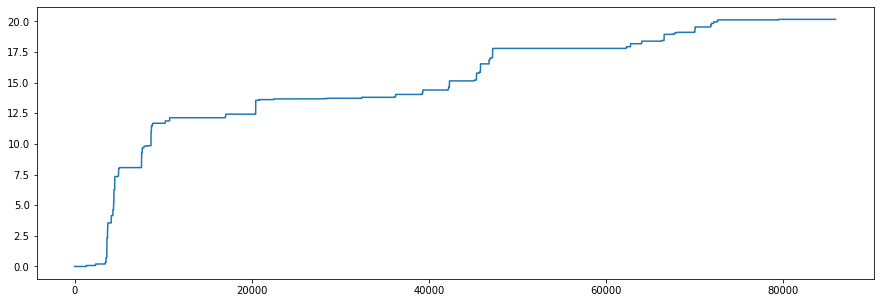

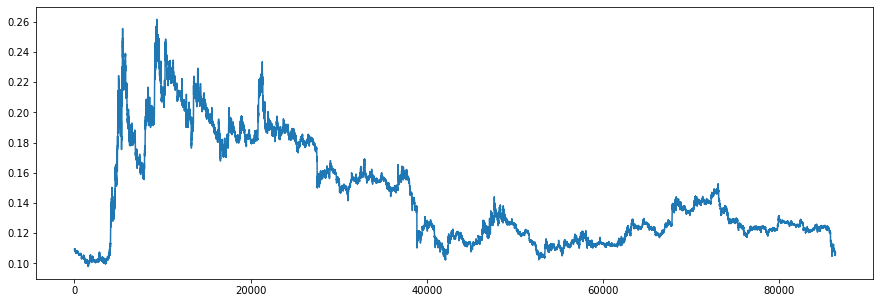

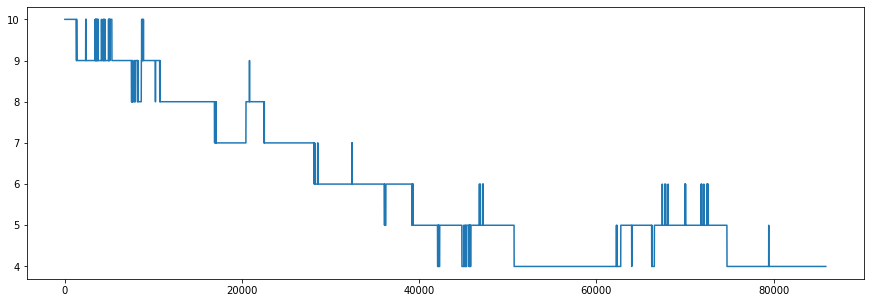

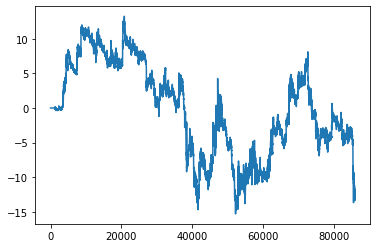

32.451799999999984
20.165524299999994
-12.28627569999999
XRPUSDT


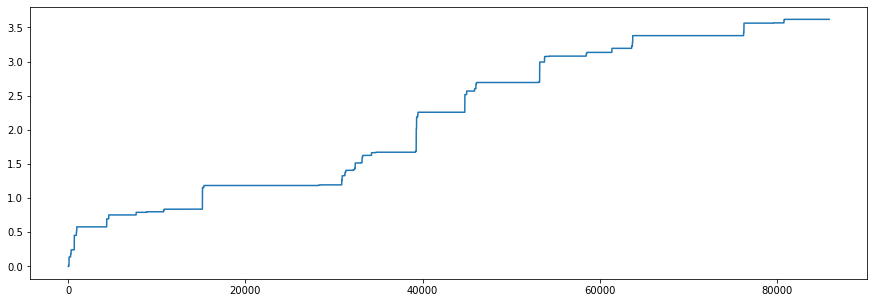

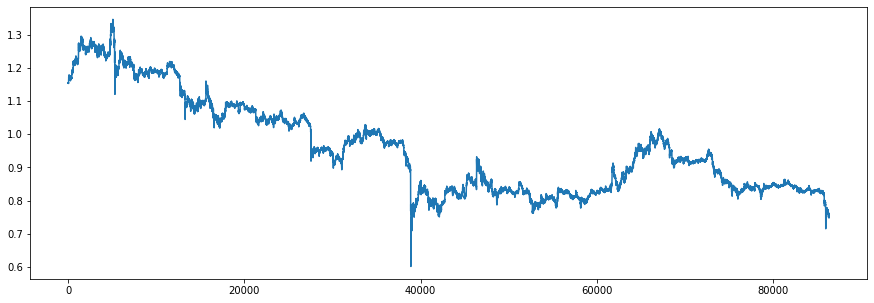

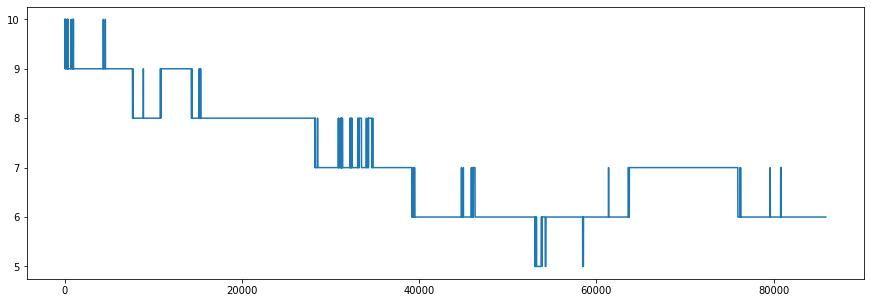

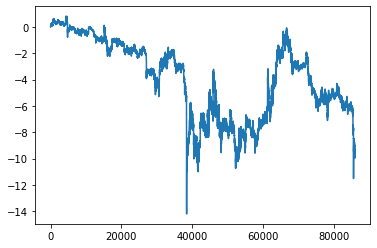

13.113700000000001
3.6174928999999776
-9.496207100000024
ARUSDT


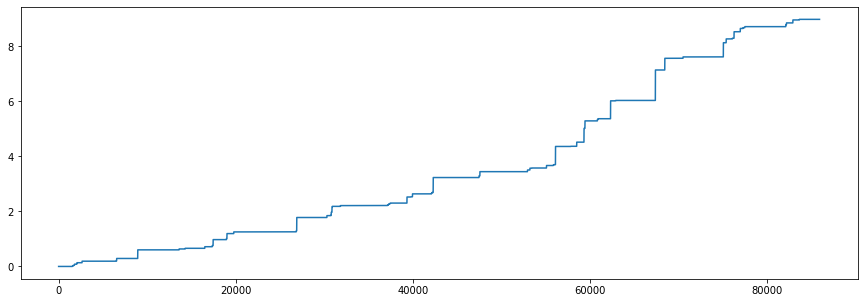

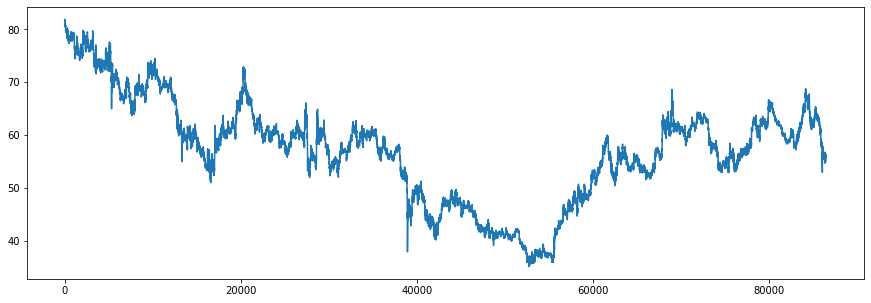

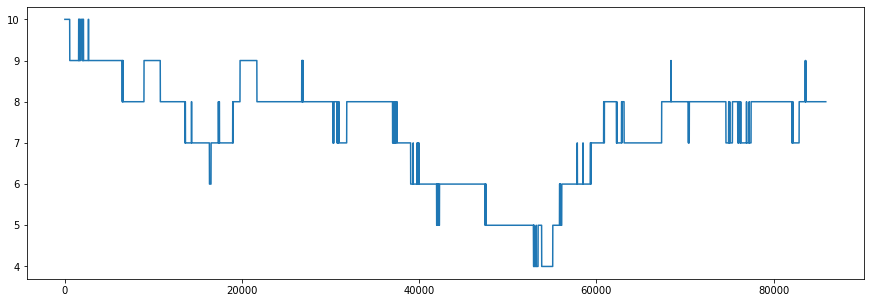

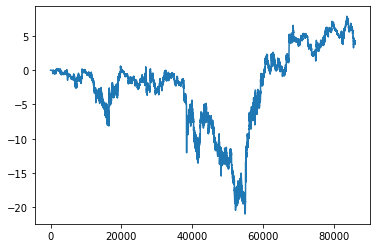

4.762899999999995
8.979864599999992
4.216964599999997
CKBUSDT


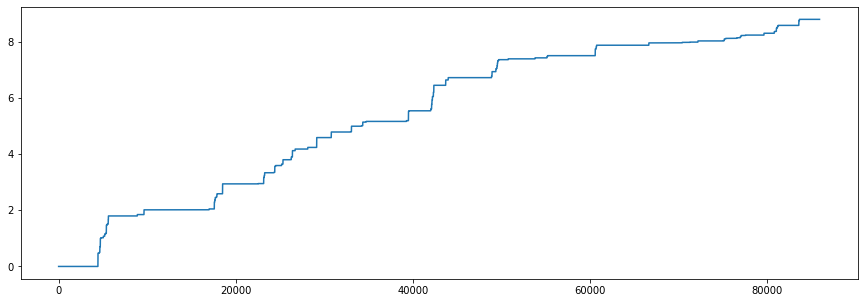

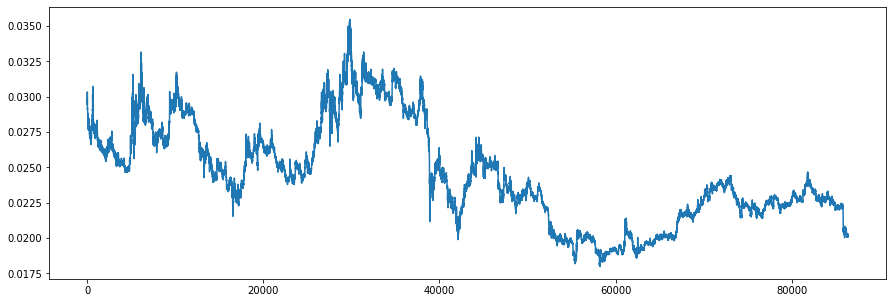

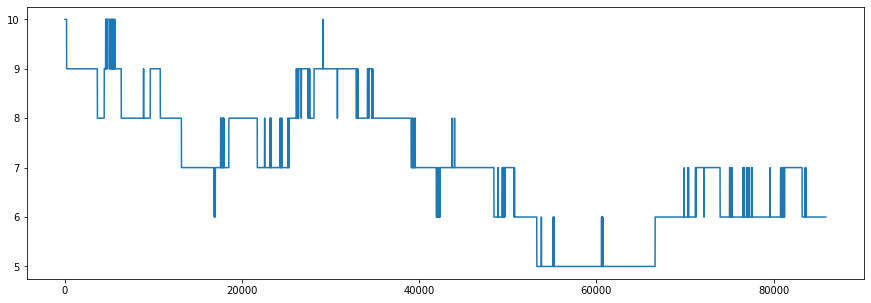

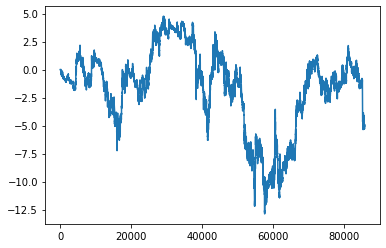

13.852680000000007
8.79295829000002
-5.059721709999987
GRTUSDT


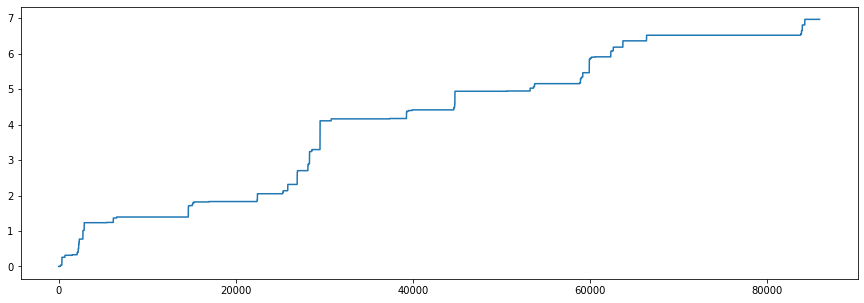

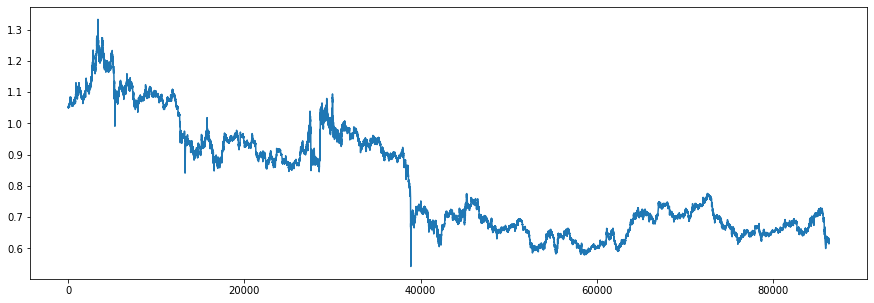

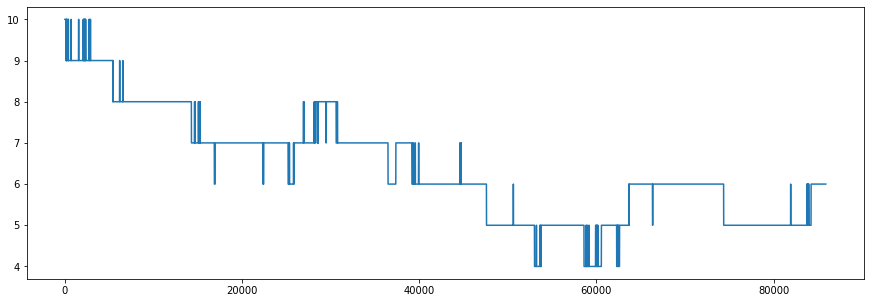

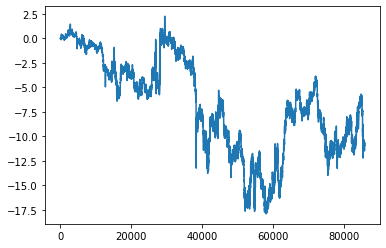

17.6084
6.96709809999998
-10.64130190000002
THETAUSDT


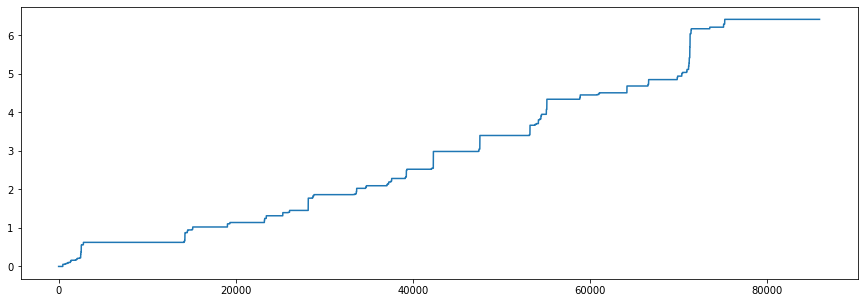

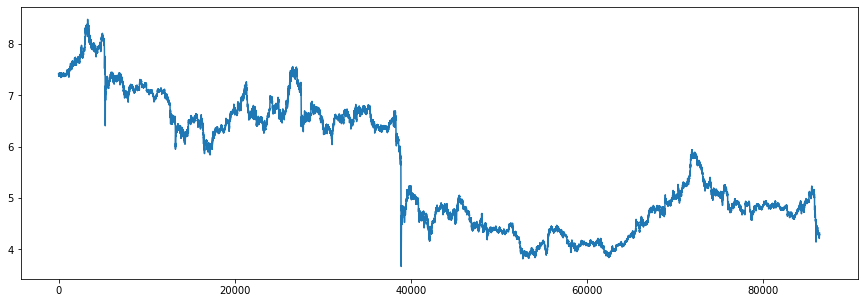

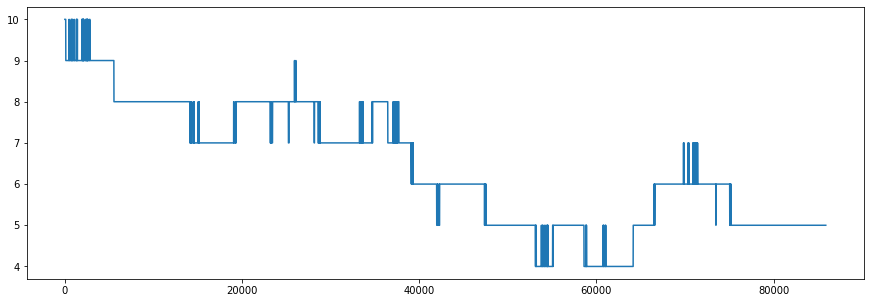

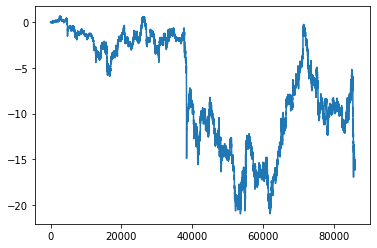

21.462699999999984
6.414149899999973
-15.04855010000001
MASKUSDT


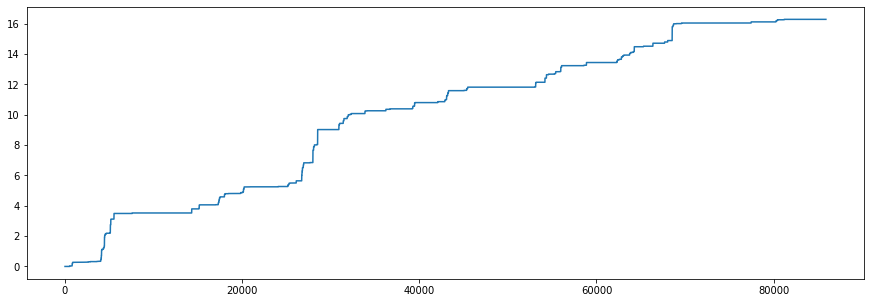

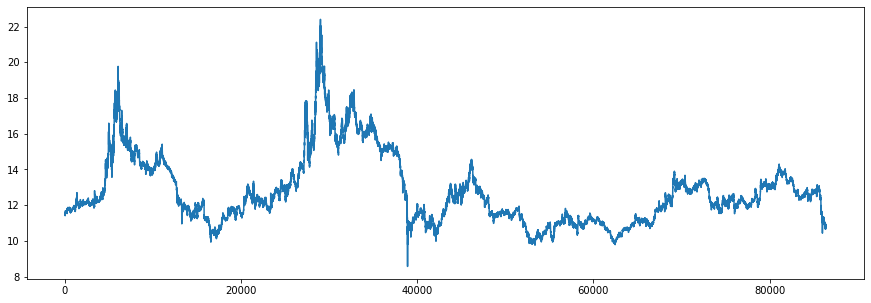

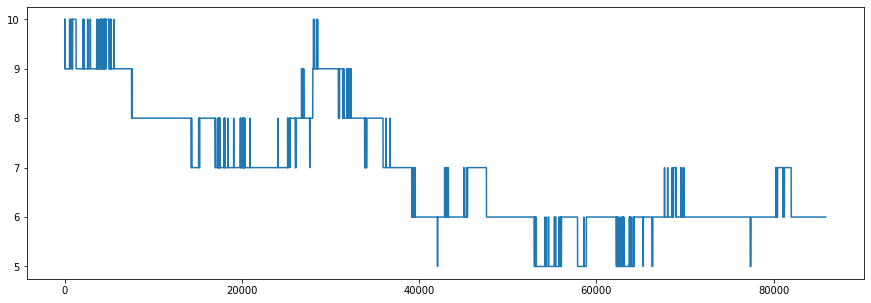

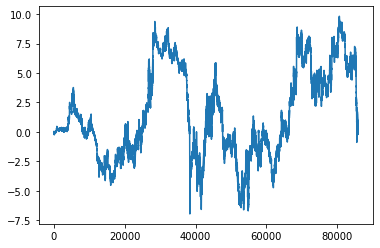

15.787599999999998
16.2847284
0.49712840000000114


In [ ]:
for n in range(0,7):

  print(allCoins[n])
  Tin=10
  TPin=10
  WALLET=pd.DataFrame({"buy":[],"quantity":[],"orderUSD":[]})

  PROFITS=pd.DataFrame({"buy":[],"sold":[],"profit":[]})
  TOTAL_PROFIT=0
  TOTAL_PROFITS=[]
  TOTAL_NET_PROFITS=[]
  #n=1
  symb=allCoins[n]
  tickSize=float(client.get_symbol_info(symbol=symb).get('filters')[2].get("stepSize"))
  allWall=[]
  DATA_SOURCE=Data[n]


  ##########
  DATA=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
  DATA_TEST=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
  (s,l)=(5,8)
  (s1,l1)=(s*15,l*15)
  (s2,l2)=(s*60,l*60)
  ##########



  #functions
  def ema_gen(data,s1,s2):
    shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
    longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
    return(shortEMA,longEMA)



  for bs in range(0,int(DATA_SOURCE["open"].shape[0])):
    TOKENS=Tin-WALLET.shape[0]
    T_PRICE=TPin+(WALLET.shape[0]*2)

    dat=DATA_SOURCE["open"][bs]  
    ######################
    #COIN=client.get_ticker(symbol=symb)
    currentPrice=float(dat)
    #currentQuantity=math.floor((T_PRICE+5-TOKENS)/(currentPrice*tickSize))
    currentQuantity=math.floor((T_PRICE)/(currentPrice*tickSize))  
    #TIME=datetime.fromtimestamp(int(COIN.get('openTime'))/1000).strftime('%Y-%m-%d %H:%M:%S')
    ######################
    #Display dash board
    #print("##################### Current price ",currentPrice,"#######################")
    #print(currentPrice , "going to purchase",currentQuantity*currentPrice*tickSize)
    #print("Available tokens ",TOKENS)
    #print("Pending slots purchased price ")
    #print(WALLET)
    #print("All profitable deals")
    #print(PROFITS)
    #print("Total profit ",TOTAL_PROFIT)
    outStandingLoss=WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice)
    DATA=DATA.append({"open":currentPrice,"wallcount":WALLET.shape[0],"outstandingLoss":outStandingLoss},ignore_index=True)
    #plt.plot(DATA["open"].tail(100))
    #plt.show()

    if DATA["open"].size>501:

      #data=something
      
    
      #pass indicator
      if int(DATA["open"].size)>501:
          
        (sEMA,lEMA)= ema_gen(DATA["open"][-500:],s,l)
        (sEMA1,lEMA1)= ema_gen(DATA["open"][-500:],s1,l1)
        (sEMA2,lEMA2)= ema_gen(DATA["open"][-500:],s2,l2)

       # if (sEMA2.iloc[-1]>lEMA2.iloc[-1]) and (sEMA1.iloc[-1]>lEMA1.iloc[-1]) :


        if (sEMA.iloc[-2]<lEMA.iloc[-2]) and (sEMA.iloc[-1]>lEMA.iloc[-1]) and TOKENS>0 and (sEMA2.iloc[-1]>lEMA2.iloc[-1]) and (sEMA1.iloc[-1]>lEMA1.iloc[-1]) :  ############## BUYING POINT
          #print("buying point####################################################")
          WALLET_CLEAR=0
          if WALLET["buy"].size>0 and (currentPrice<(WALLET["buy"].min())*0.9):
            WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)
              
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance
              

            
          elif WALLET["buy"].size==0:
            WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)   
            
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance

            

        elif (sEMA.iloc[-1]<lEMA.iloc[-1]) or (sEMA2.iloc[-1]<lEMA2.iloc[-1]) or(sEMA1.iloc[-1]<lEMA1.iloc[-1]) :   ############ SELLING POINT
          #print("selling_point######################################################################################################++++++++++++++++")
          WALLET_CLEAR=1
          dropped_index=[]
          ind=0
          for bought in WALLET["buy"]:
            tempProfit=((currentPrice-bought)-((currentPrice +bought)*0.001))*WALLET["quantity"][ind]*tickSize
            if tempProfit>0:
              PROFITS=PROFITS.append({"buy":bought*WALLET["quantity"][ind]*tickSize,"sold":currentPrice*WALLET["quantity"][ind]*tickSize,"profit":tempProfit},ignore_index=True)

              #sell binance
            # client.create_order( symbol=symb,side=SIDE_SELL, type=ORDER_TYPE_MARKET,quantity=WALLET["quantity"][ind])
              #sell binance

              dropped_index.append(ind)
              TOTAL_PROFIT=TOTAL_PROFIT+tempProfit
              
              #print("sell actually")
            ind=ind+1
          if len(dropped_index)>0:
            WALLET=WALLET.drop(WALLET.index[dropped_index])
        
            
        
        allWall.append(TOKENS)
        TOTAL_PROFITS.append(TOTAL_PROFIT)
        TOTAL_NET_PROFITS.append(TOTAL_PROFIT-(WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice*tickSize)))
        #time.sleep(0.05)
        #clear_output()
   
  
  plt.figure(figsize=(15,5))
  plt.plot(TOTAL_PROFITS)
  plt.show()
  plt.figure(figsize=(15,5))
  plt.plot(Data[n]["open"])
  plt.show()
  plt.figure(figsize=(15,5))
  plt.plot(allWall)
  plt.show()
  plt.plot(TOTAL_NET_PROFITS)
  plt.show()
  if WALLET["orderUSD"][0]>0:
    print(WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice*tickSize))
    print(TOTAL_PROFIT)
    print(TOTAL_PROFIT-(WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice*tickSize)))
    #print(WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice)

IOTXUSDT


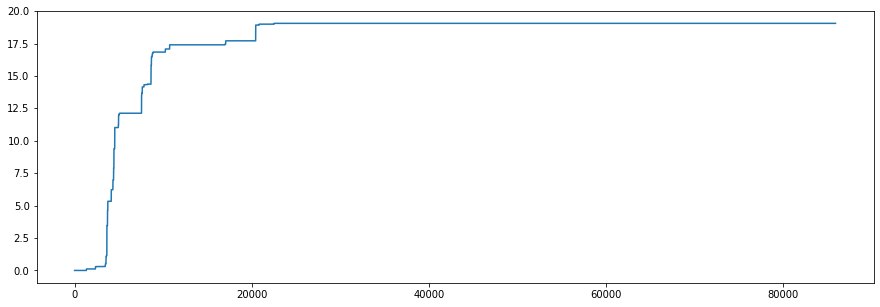

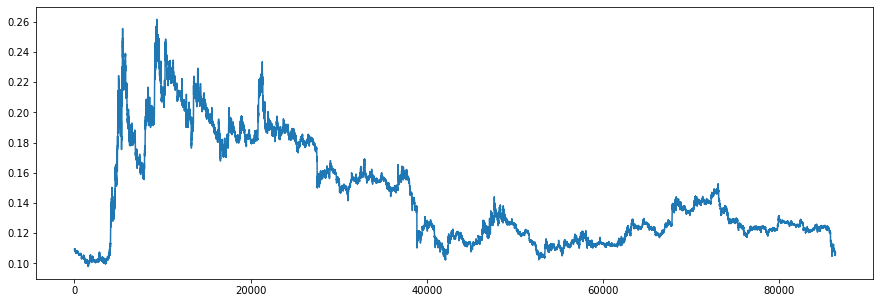

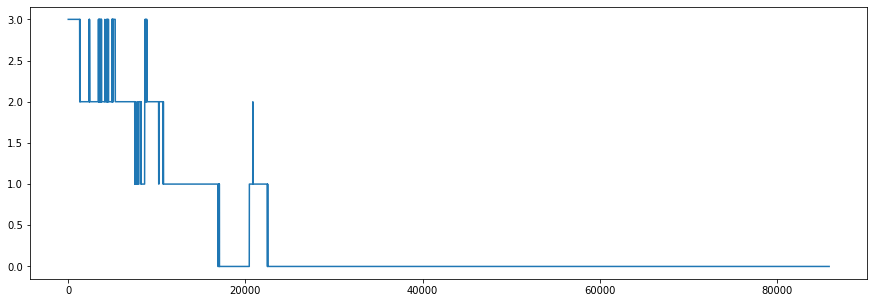

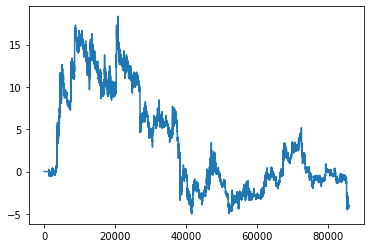

23.045009999999998
19.054807810000003
-3.9902021899999944
XRPUSDT


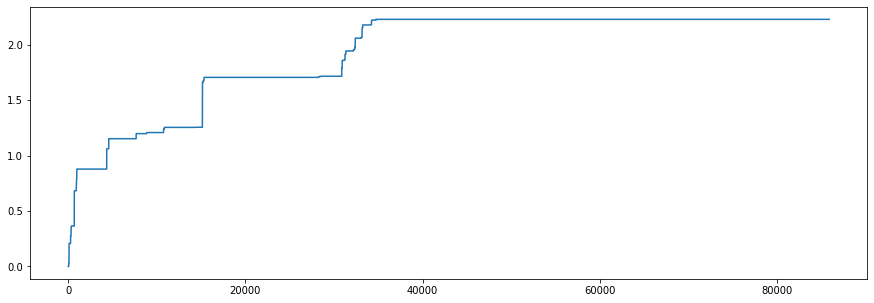

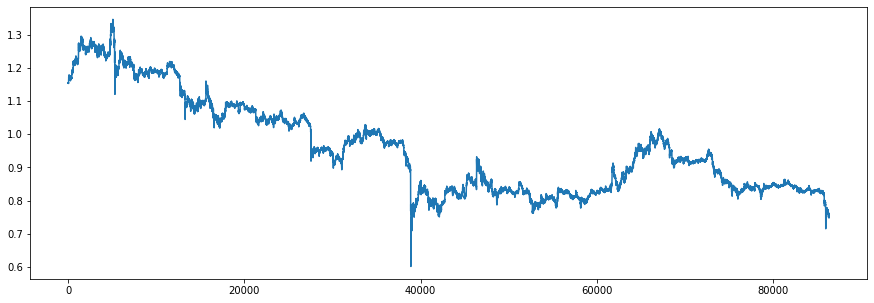

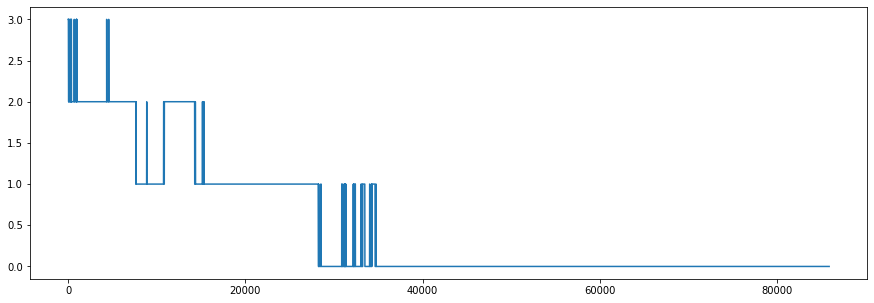

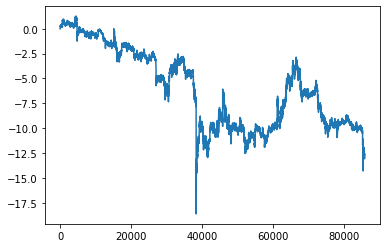

14.934900000000003
2.22915129999999
-12.705748700000012
ARUSDT


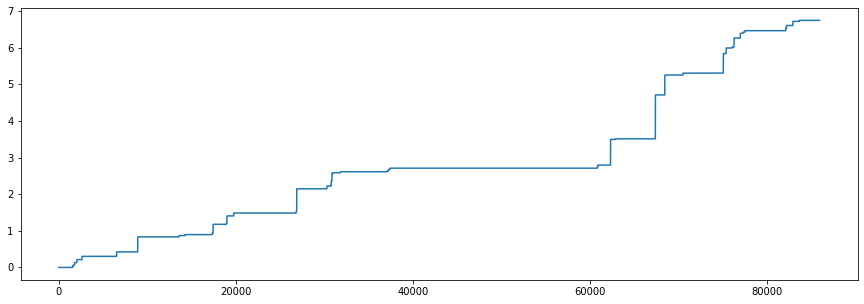

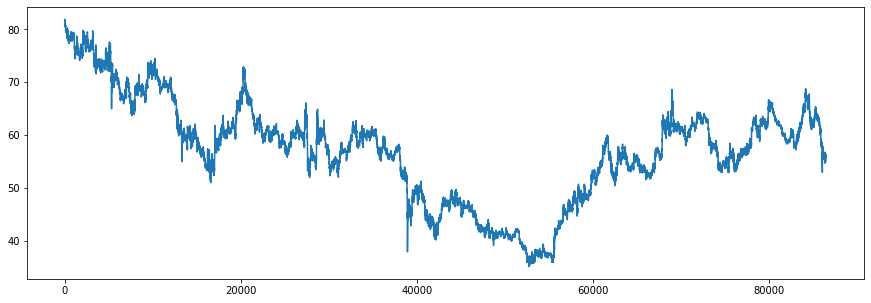

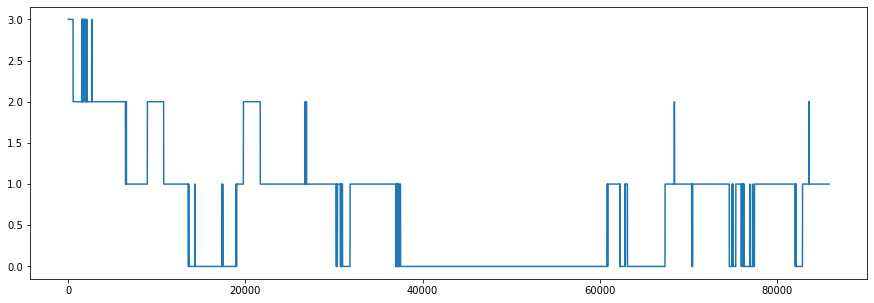

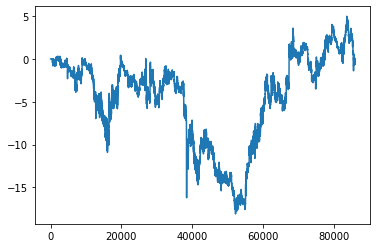

6.8211999999999975
6.748866999999999
-0.07233299999999865
CKBUSDT


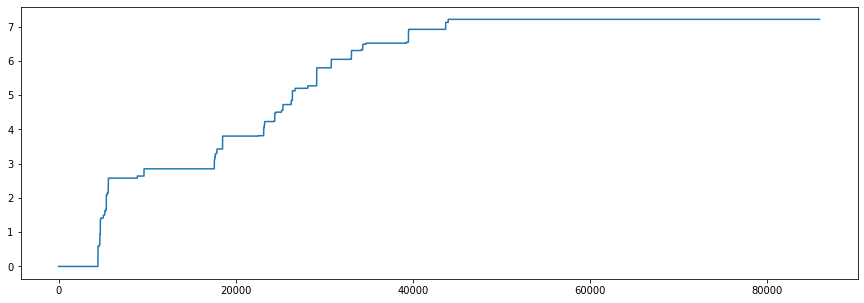

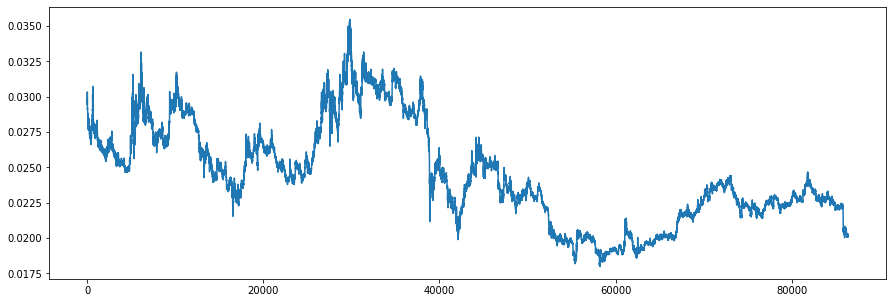

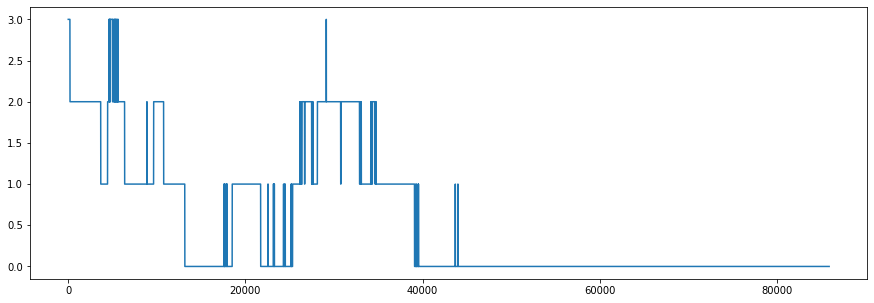

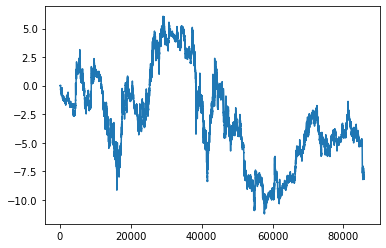

15.208519999999996
7.216787270000009
-7.991732729999987
GRTUSDT


KeyboardInterrupt: ignored

In [ ]:
for n in range(0,7):

  print(allCoins[n])
  TOKENS=3
  T_PRICE=15
  WALLET=pd.DataFrame({"buy":[],"quantity":[],"orderUSD":[]})

  PROFITS=pd.DataFrame({"buy":[],"sold":[],"profit":[]})
  TOTAL_PROFIT=0
  TOTAL_PROFITS=[]
  TOTAL_NET_PROFITS=[]
  #n=1
  symb=allCoins[n]
  tickSize=float(client.get_symbol_info(symbol=symb).get('filters')[2].get("stepSize"))
  allWall=[]
  DATA_SOURCE=Data[n]


  ##########
  DATA=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
  DATA_TEST=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
  (s,l)=(5,8)
  (s1,l1)=(s*15,l*15)
  (s2,l2)=(s*60,l*60)
  ##########



  #functions
  def ema_gen(data,s1,s2):
    shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
    longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
    return(shortEMA,longEMA)



  for bs in range(0,int(DATA_SOURCE["open"].shape[0])):
    dat=DATA_SOURCE["open"][bs]  
    ######################
    #COIN=client.get_ticker(symbol=symb)
    currentPrice=float(dat)
    #currentQuantity=math.floor((T_PRICE+5-TOKENS)/(currentPrice*tickSize))
    currentQuantity=math.floor((T_PRICE)/(currentPrice*tickSize))  
    #TIME=datetime.fromtimestamp(int(COIN.get('openTime'))/1000).strftime('%Y-%m-%d %H:%M:%S')
    ######################
    #Display dash board
    #print("##################### Current price ",currentPrice,"#######################")
    #print(currentPrice , "going to purchase",currentQuantity*currentPrice*tickSize)
    #print("Available tokens ",TOKENS)
    #print("Pending slots purchased price ")
    #print(WALLET)
    #print("All profitable deals")
    #print(PROFITS)
    #print("Total profit ",TOTAL_PROFIT)
    outStandingLoss=WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice)
    DATA=DATA.append({"open":currentPrice,"wallcount":WALLET.shape[0],"outstandingLoss":outStandingLoss},ignore_index=True)
    #plt.plot(DATA["open"].tail(100))
    #plt.show()

    if DATA["open"].size>501:

      #data=something
      
    
      #pass indicator
      if int(DATA["open"].size)>501:
          
        (sEMA,lEMA)= ema_gen(DATA["open"][-500:],s,l)
        (sEMA1,lEMA1)= ema_gen(DATA["open"][-500:],s1,l1)
        (sEMA2,lEMA2)= ema_gen(DATA["open"][-500:],s2,l2)

       # if (sEMA2.iloc[-1]>lEMA2.iloc[-1]) and (sEMA1.iloc[-1]>lEMA1.iloc[-1]) :


        if (sEMA.iloc[-2]<lEMA.iloc[-2]) and (sEMA.iloc[-1]>lEMA.iloc[-1]) and TOKENS>0 and (sEMA2.iloc[-1]>lEMA2.iloc[-1]) and (sEMA1.iloc[-1]>lEMA1.iloc[-1]) :  ############## BUYING POINT
          #print("buying point####################################################")
          WALLET_CLEAR=0
          if WALLET["buy"].size>0 and (currentPrice<(WALLET["buy"].min())*0.90):
            WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)
              
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance
              

            TOKENS=TOKENS-1
          elif WALLET["buy"].size==0:
            WALLET=WALLET.append({"buy":currentPrice,"quantity":currentQuantity,"orderUSD":currentQuantity*currentPrice*tickSize},ignore_index=True)   
            
            #buy binance
            #client.create_order(symbol=symb,side=SIDE_BUY,type=ORDER_TYPE_MARKET,quantity=currentQuantity)
            #buy binance

            TOKENS=TOKENS-1

        elif (sEMA.iloc[-1]<lEMA.iloc[-1]) or (sEMA2.iloc[-1]<lEMA2.iloc[-1]) or(sEMA1.iloc[-1]<lEMA1.iloc[-1]) :   ############ SELLING POINT
          #print("selling_point######################################################################################################++++++++++++++++")
          WALLET_CLEAR=1
          dropped_index=[]
          ind=0
          for bought in WALLET["buy"]:
            tempProfit=((currentPrice-bought)-((currentPrice +bought)*0.001))*WALLET["quantity"][ind]*tickSize
            if tempProfit>0:
              PROFITS=PROFITS.append({"buy":bought*WALLET["quantity"][ind]*tickSize,"sold":currentPrice*WALLET["quantity"][ind]*tickSize,"profit":tempProfit},ignore_index=True)

              #sell binance
            # client.create_order( symbol=symb,side=SIDE_SELL, type=ORDER_TYPE_MARKET,quantity=WALLET["quantity"][ind])
              #sell binance

              dropped_index.append(ind)
              TOTAL_PROFIT=TOTAL_PROFIT+tempProfit
              TOKENS=TOKENS+1
              #print("sell actually")
            ind=ind+1
          if len(dropped_index)>0:
            WALLET=WALLET.drop(WALLET.index[dropped_index])
        
            
        
        allWall.append(TOKENS)
        TOTAL_PROFITS.append(TOTAL_PROFIT)
        TOTAL_NET_PROFITS.append(TOTAL_PROFIT-(WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice*tickSize)))
        #time.sleep(0.05)
        #clear_output()
   
  
  plt.figure(figsize=(15,5))
  plt.plot(TOTAL_PROFITS)
  plt.show()
  plt.figure(figsize=(15,5))
  plt.plot(Data[n]["open"])
  plt.show()
  plt.figure(figsize=(15,5))
  plt.plot(allWall)
  plt.show()
  plt.plot(TOTAL_NET_PROFITS)
  plt.show()
  if WALLET["orderUSD"][0]>0:
    print(WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice*tickSize))
    print(TOTAL_PROFIT)
    print(TOTAL_PROFIT-(WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice*tickSize)))
    #print(WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice)

IOTXUSDT


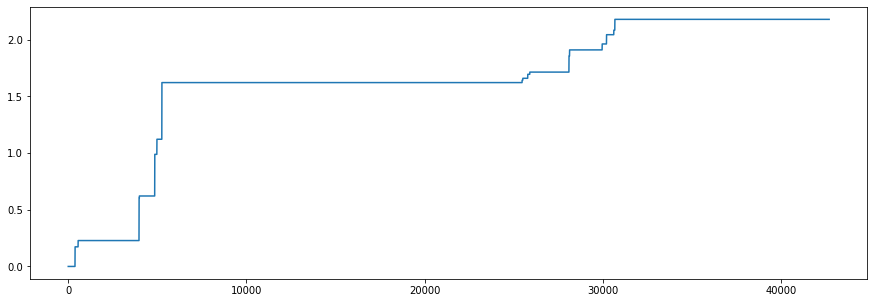

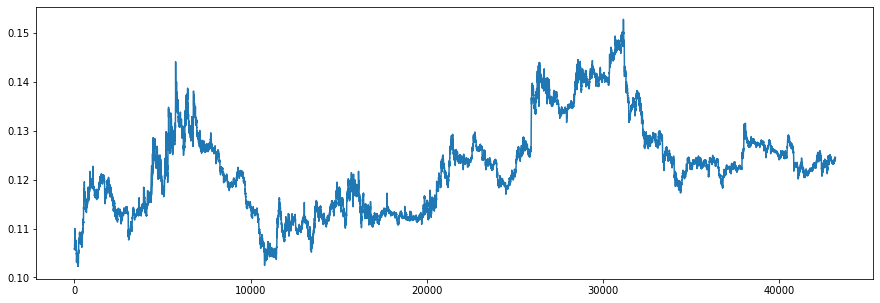

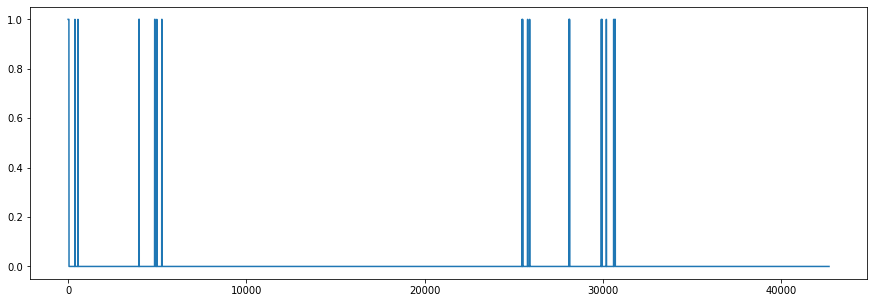

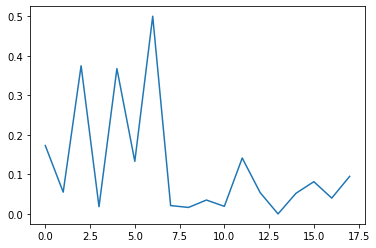

1.9239999999999995
XRPUSDT


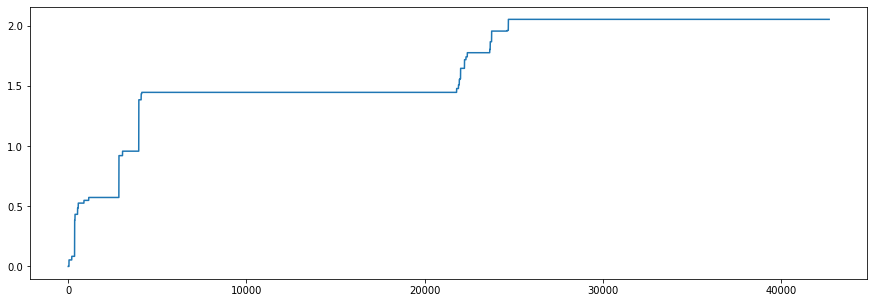

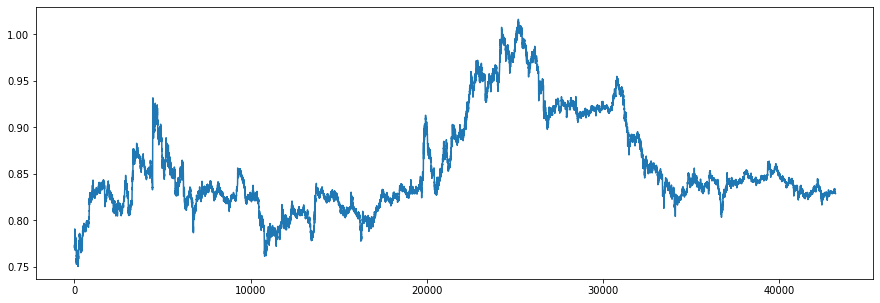

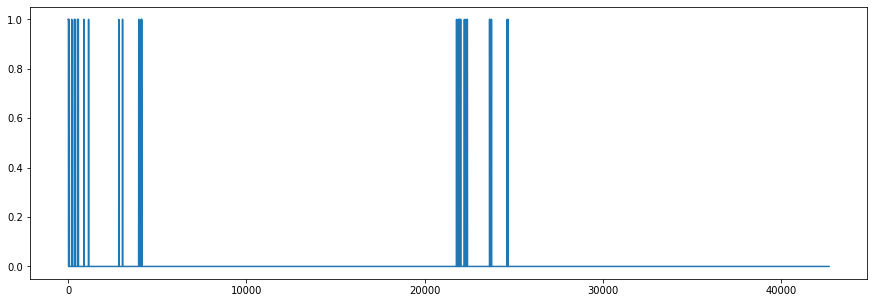

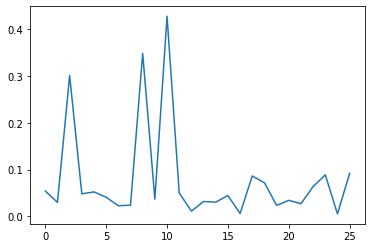

2.0229
ARUSDT


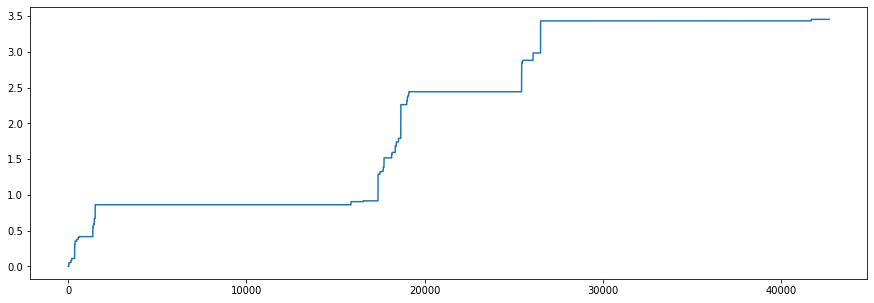

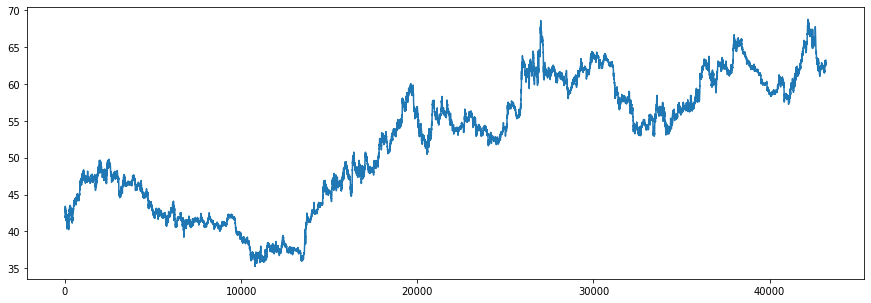

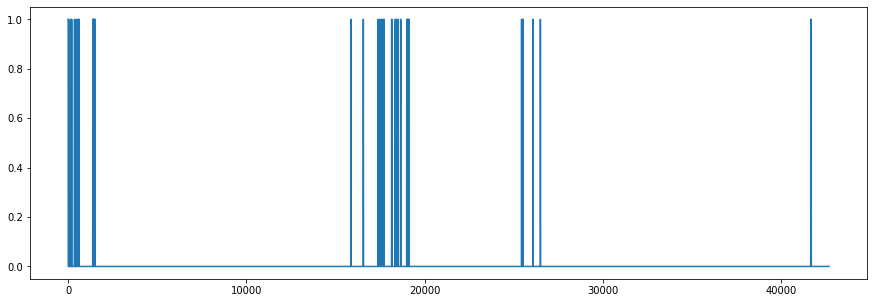

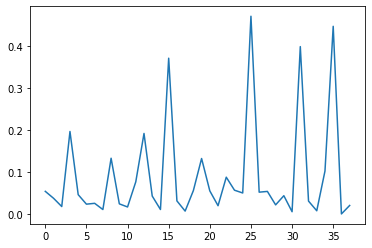

0.8890999999999991
CKBUSDT


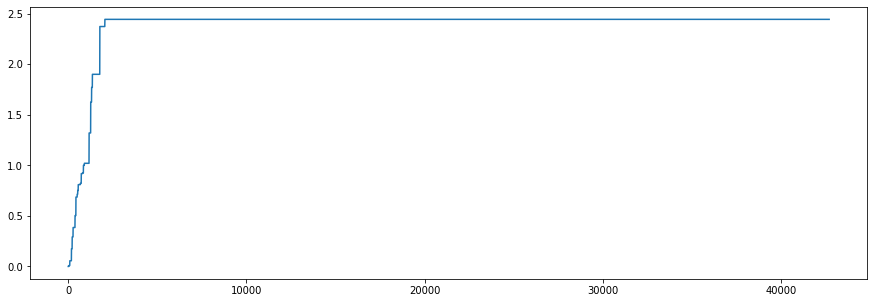

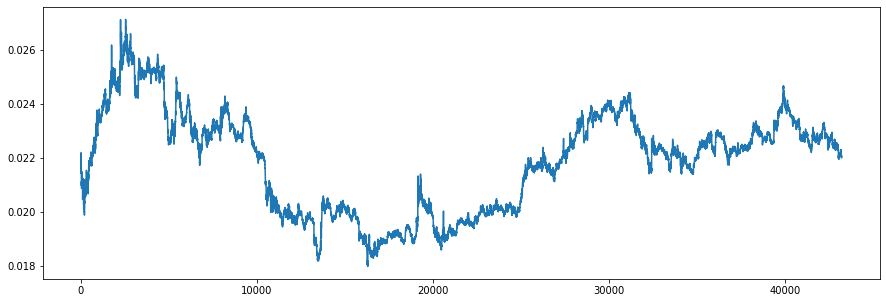

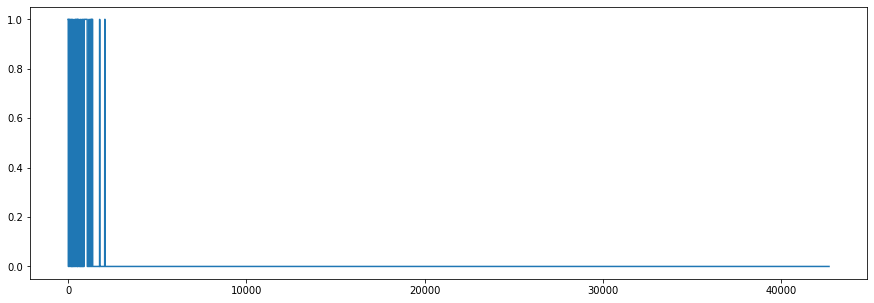

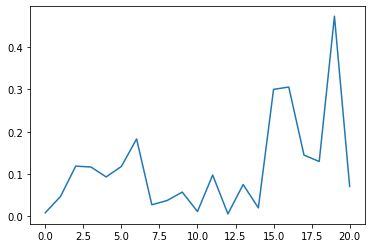

1.9977300000000007
GRTUSDT


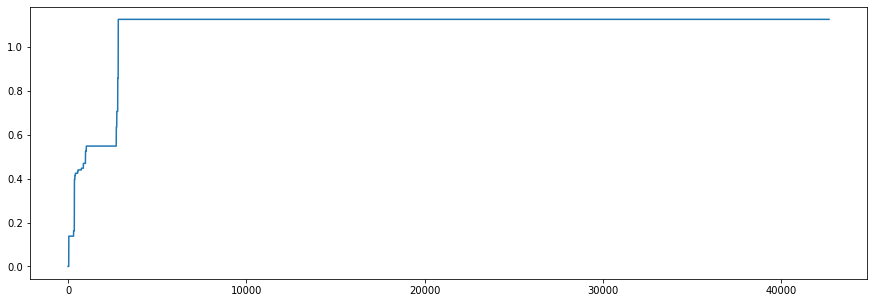

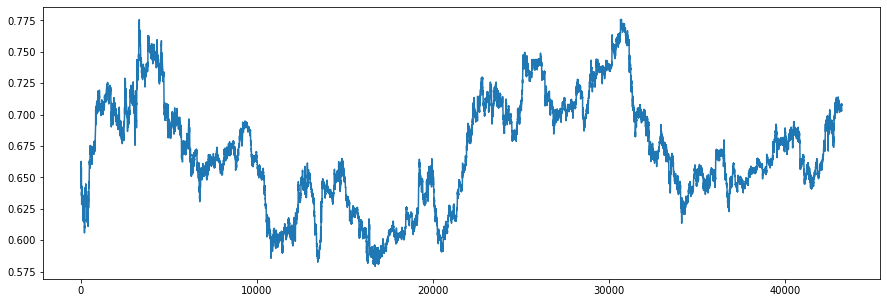

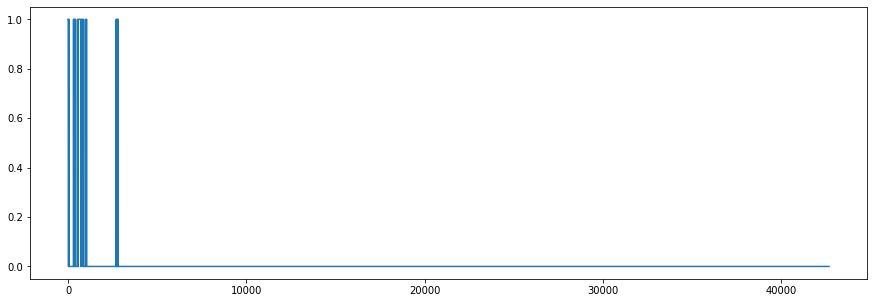

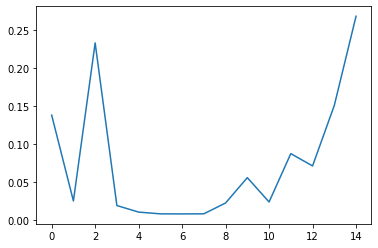

1.001999999999999
THETAUSDT


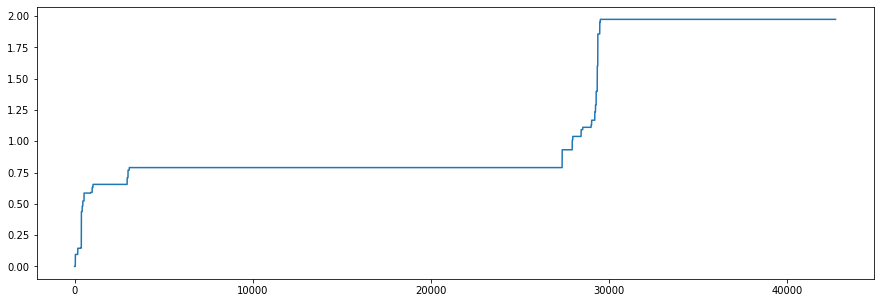

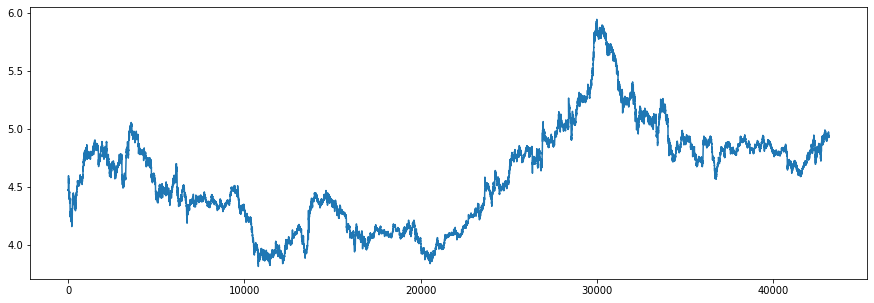

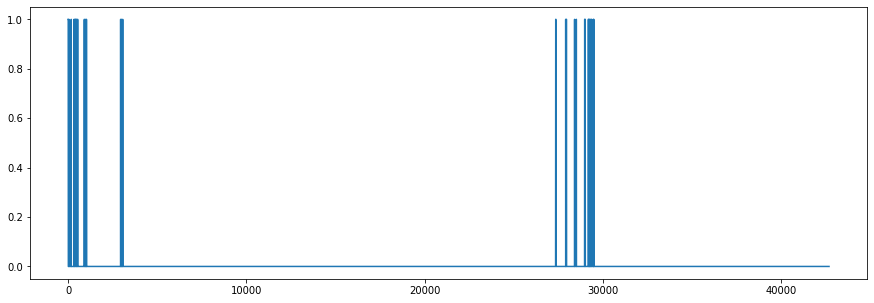

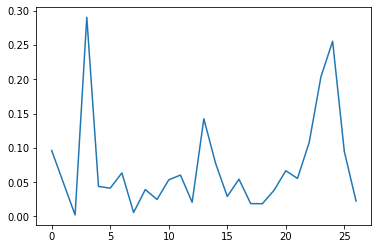

1.9600000000000009
MASKUSDT


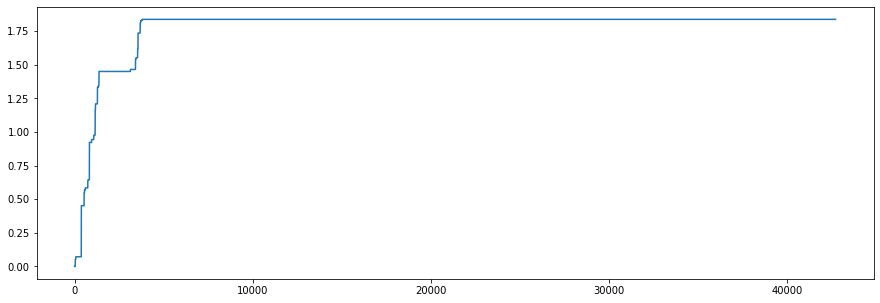

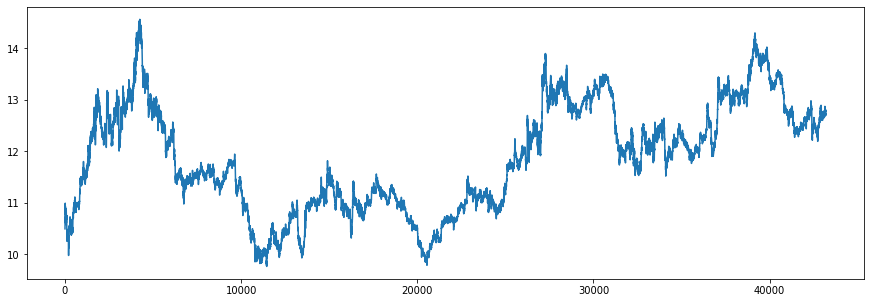

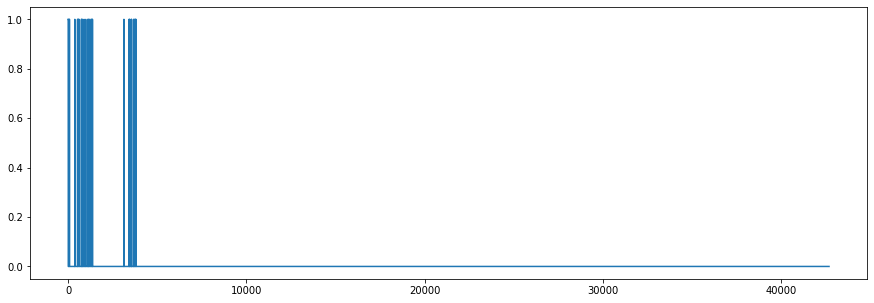

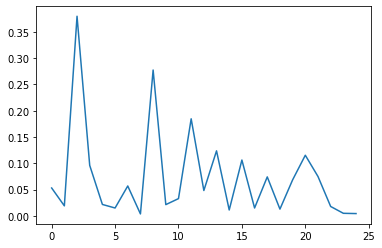

1.2744


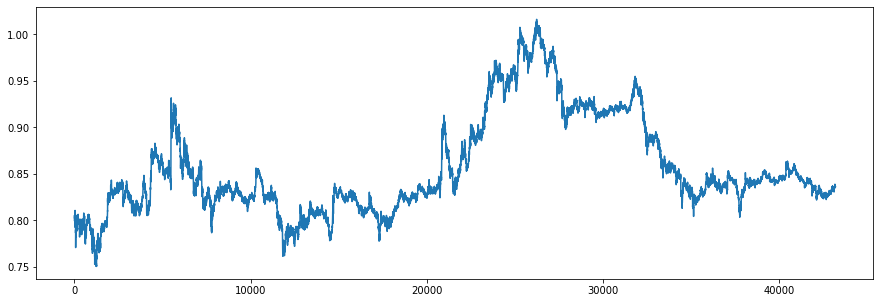

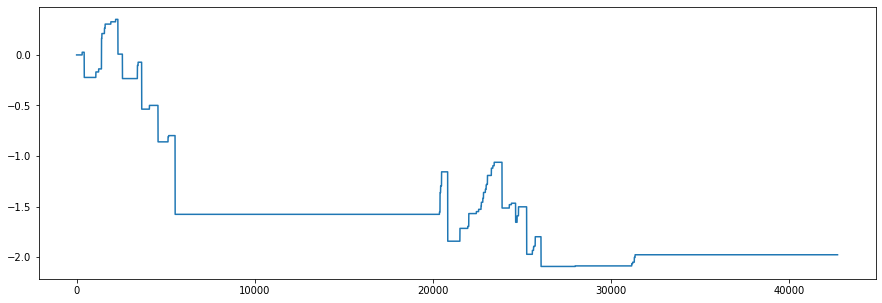

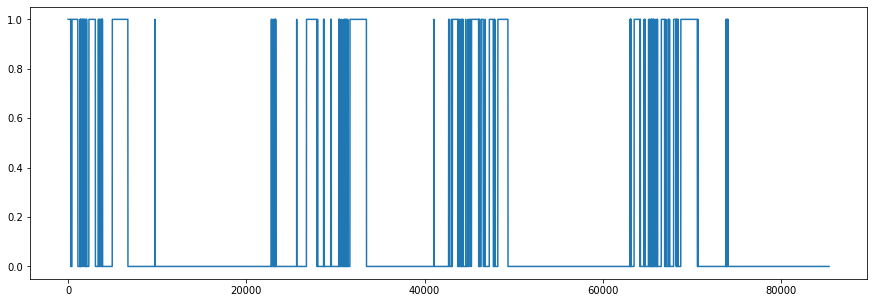

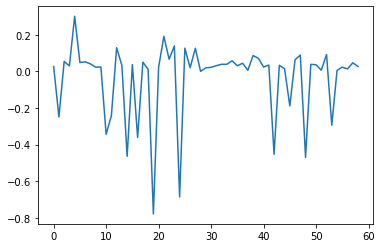

1.3847999999999985

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[n]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()
WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice

In [ ]:
IOTXUSDT

3.0110499999999973
3.7802498800000017
0.7691998800000044
XRPUSDT

3.1389999999999993
2.3828959999999912
-0.7561040000000081
ARUSDT

1.0982999999999983
6.744321299999994
5.646021299999996
CKBUSDT

3.20129
4.721302390000008
1.5200123900000078
GRTUSDT

1.2691999999999997
2.7957879999999826
1.526587999999983
THETAUSDT

3.2227999999999994
5.050446399999972
1.8276463999999724
MASKUSDT

1.682100000000002
6.722896299999997
5.040796299999995

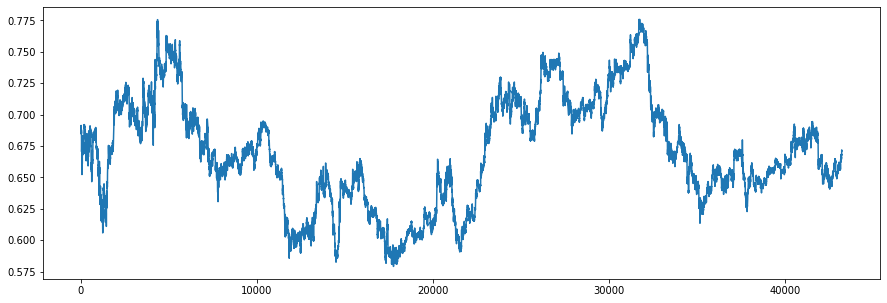

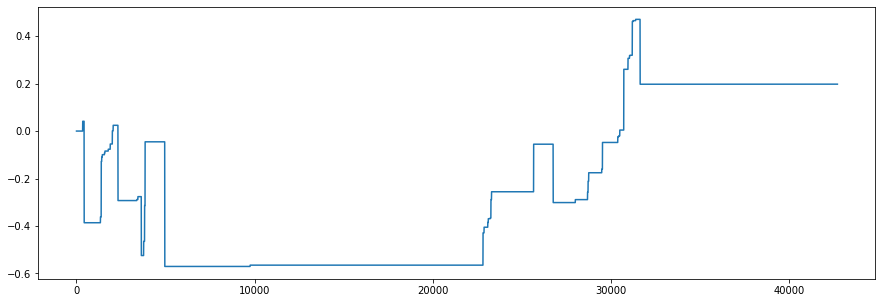

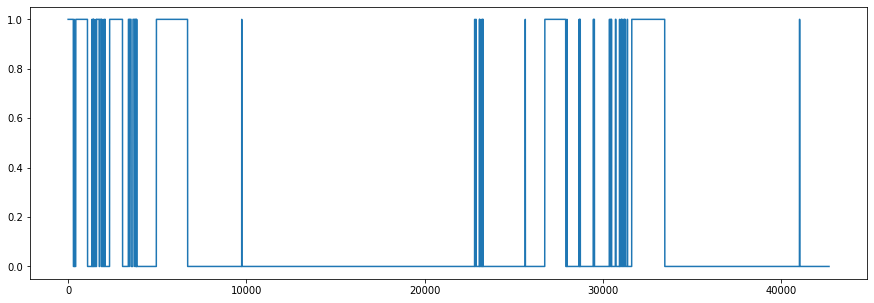

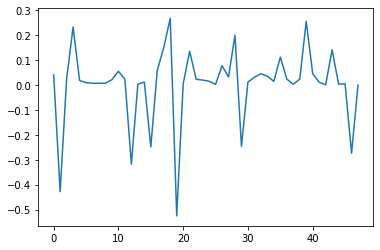

0.3247

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[n]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()
WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice

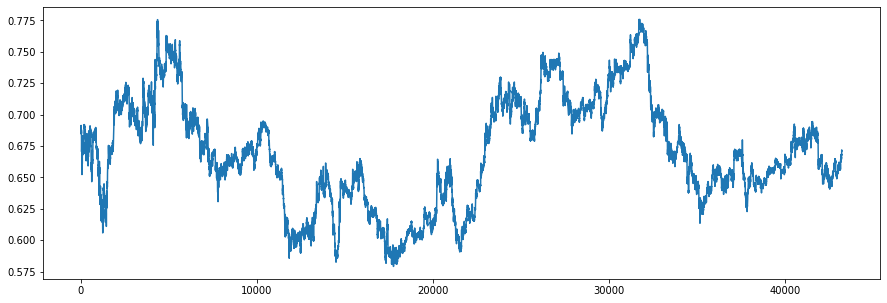

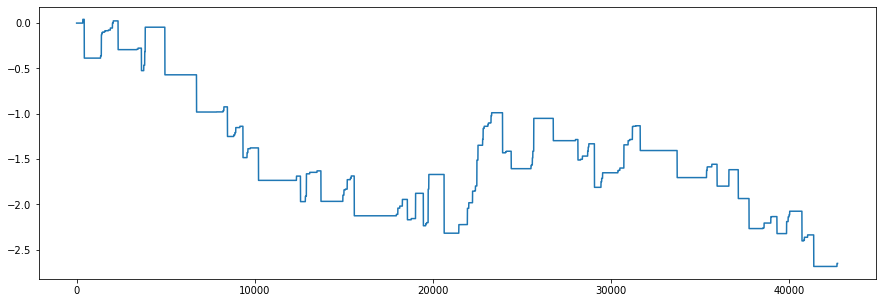

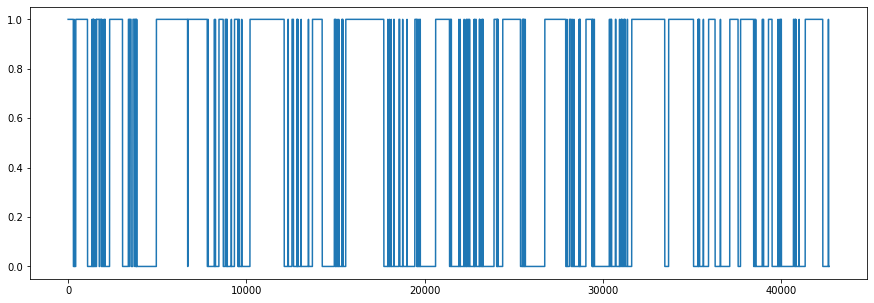

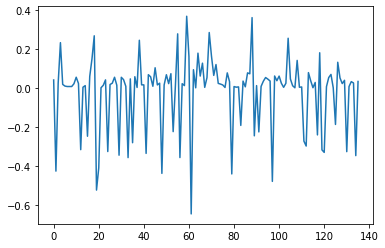

-0.051000000000000156

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[n]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()
WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice

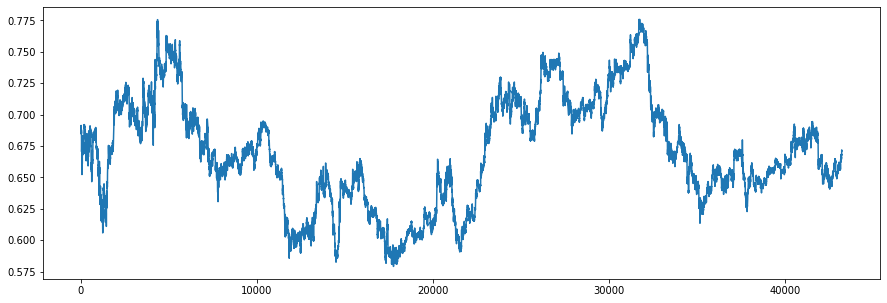

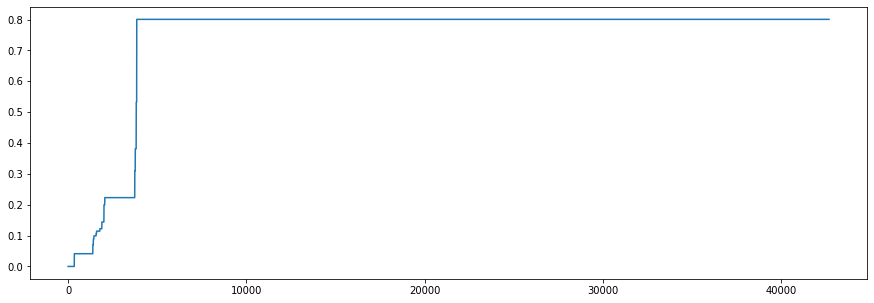

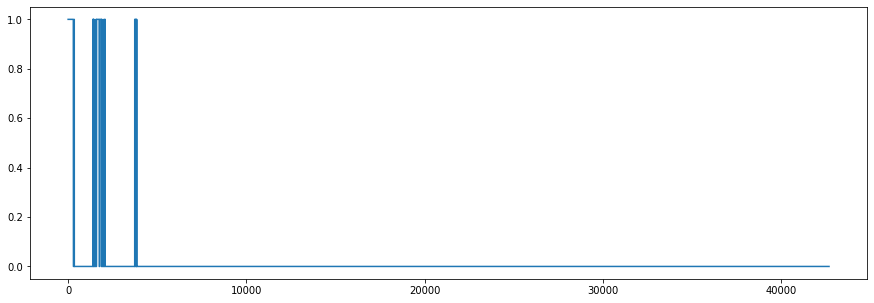

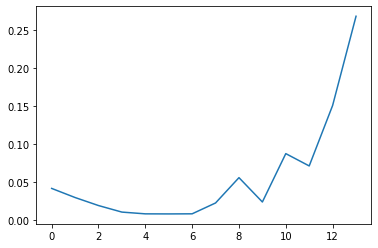

1.5509999999999984

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[n]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()
WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice

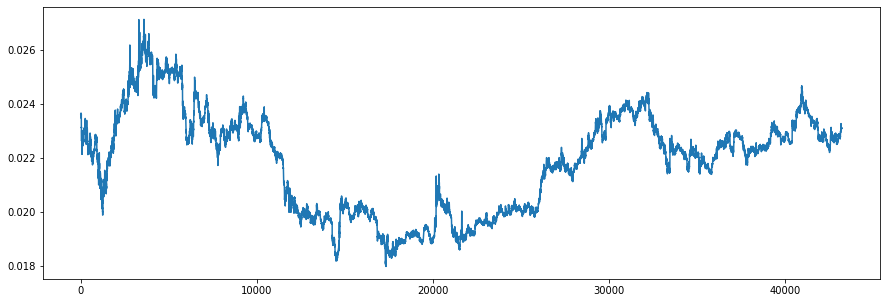

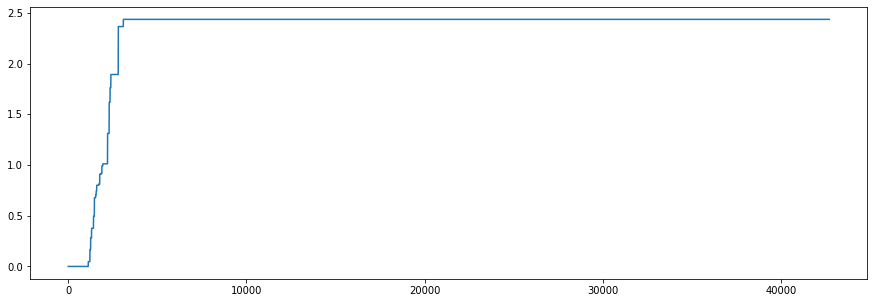

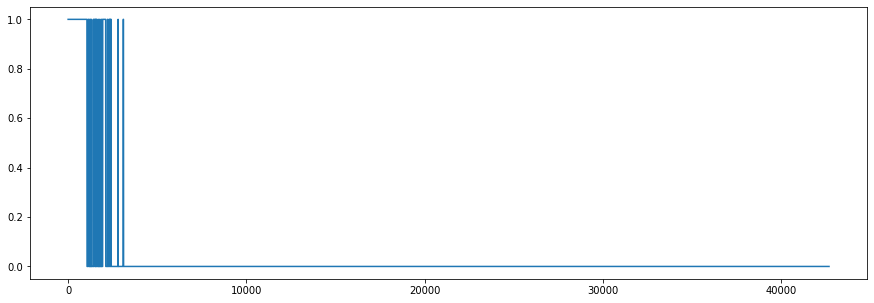

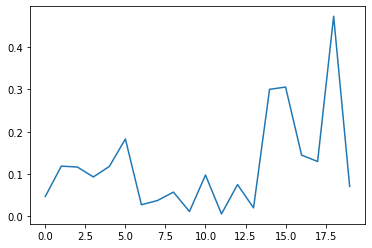

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[n]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()

In [ ]:
WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice

1.522079999999999

In [ ]:
WALLET

,buy,quantity,orderUSD
0,67.42,17.0,11.4614


In [ ]:
WALLET["orderUSD"][0]-WALLET["quantity"][0]*tickSize*currentPrice

-0.06799999999999784

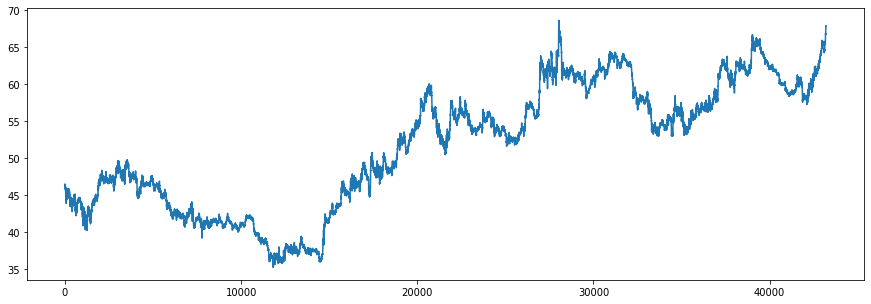

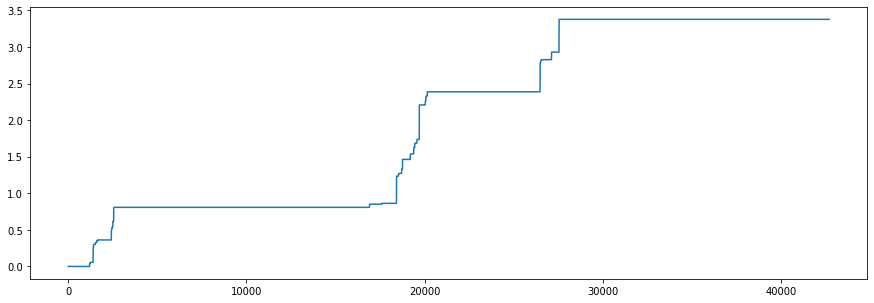

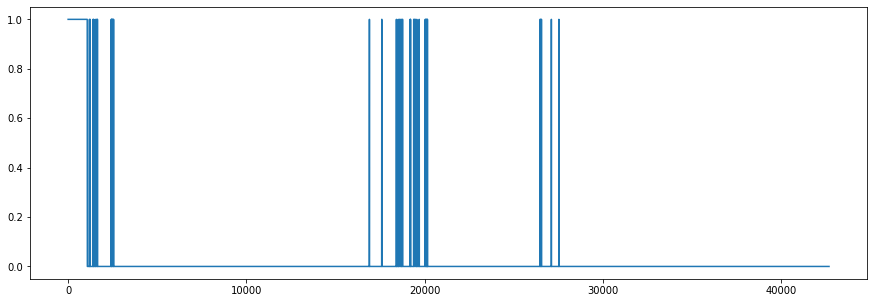

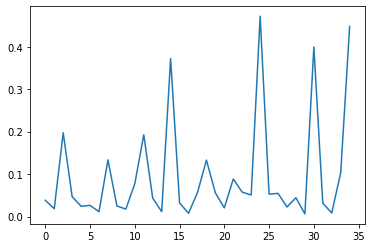

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[n]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()

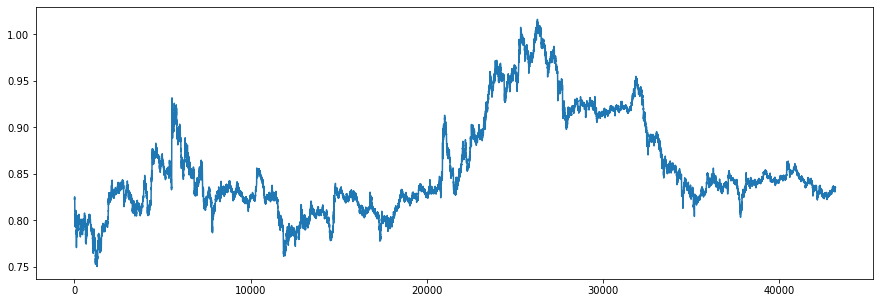

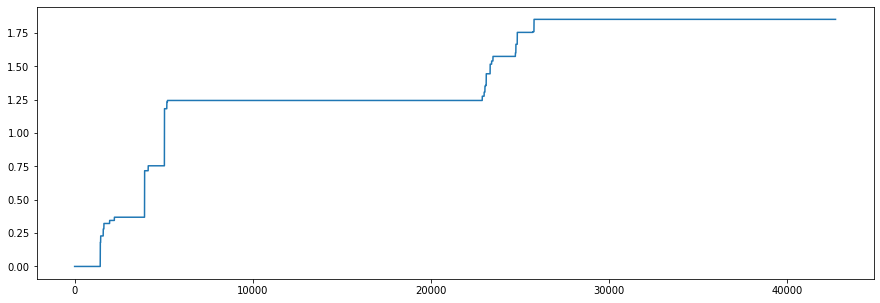

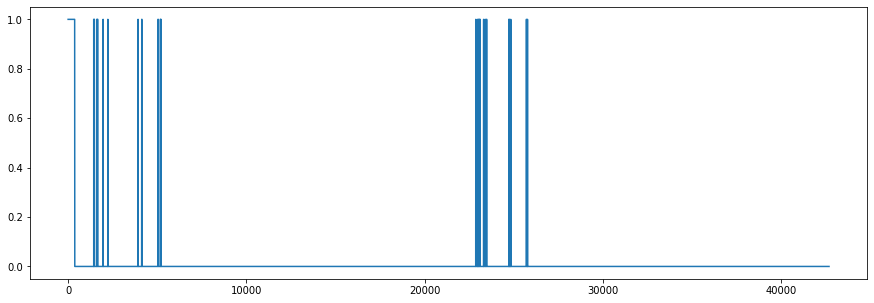

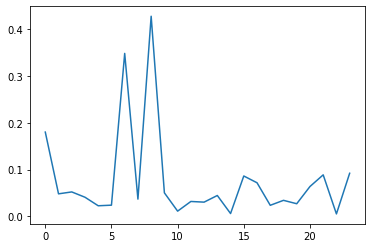

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Data[1]["open"])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()

9.24

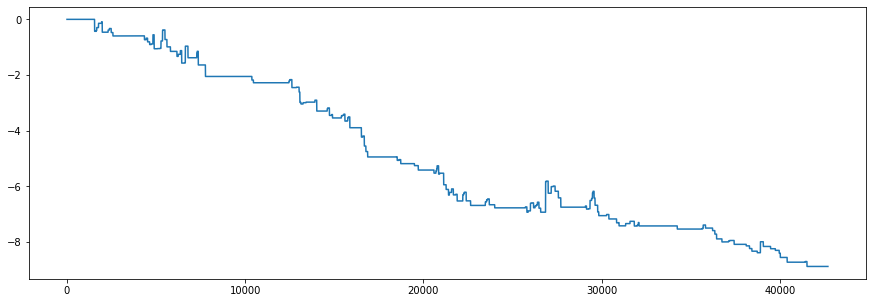

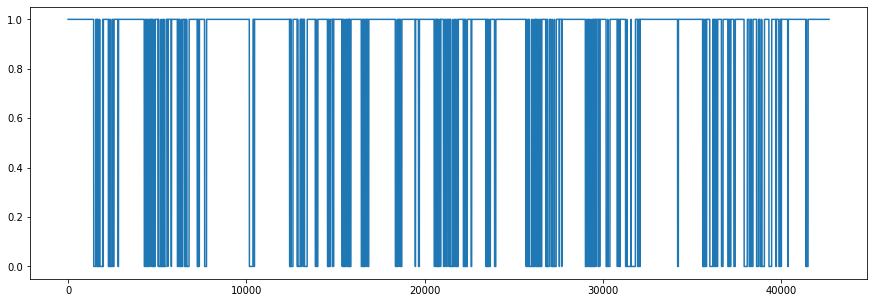

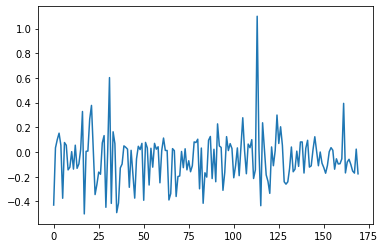

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()

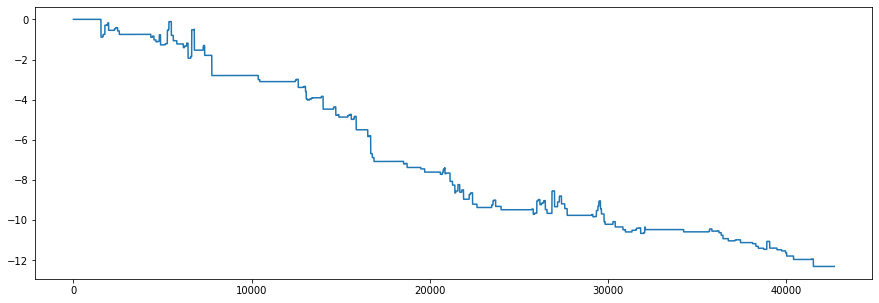

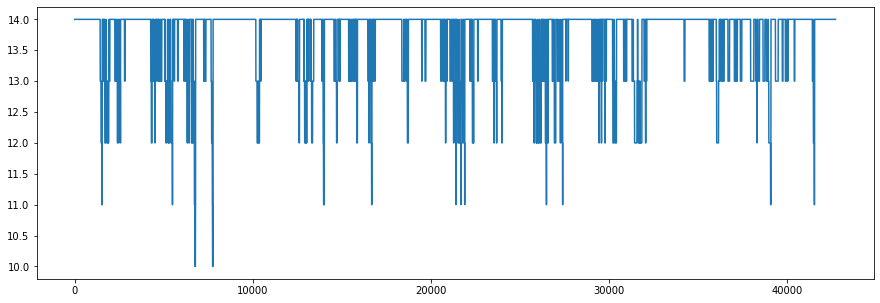

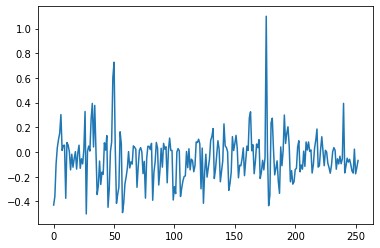

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()

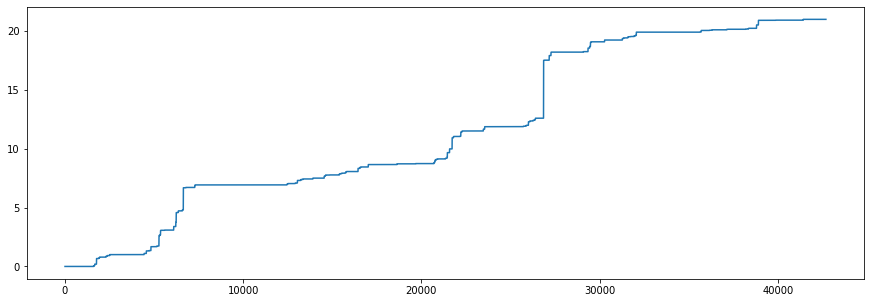

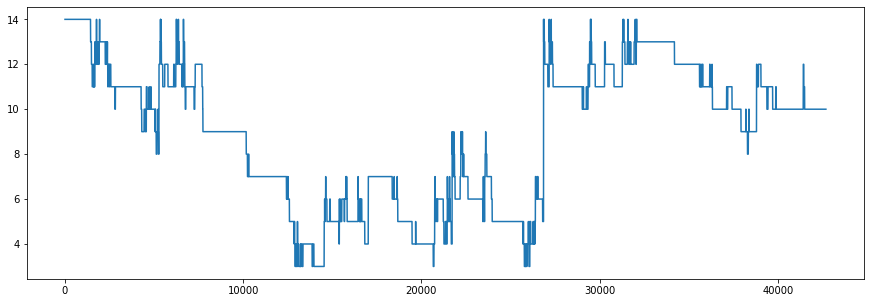

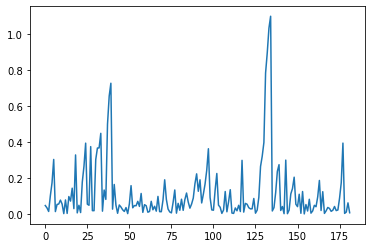

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()

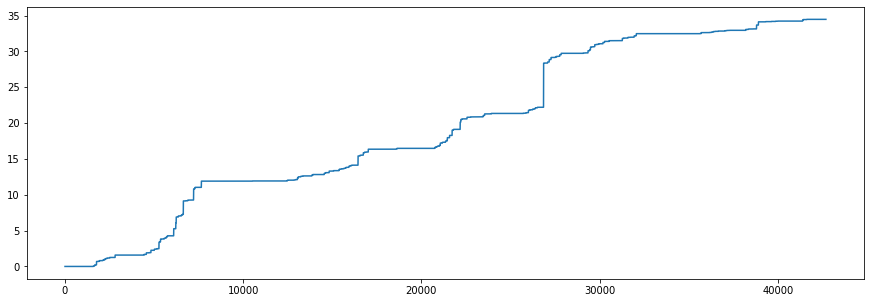

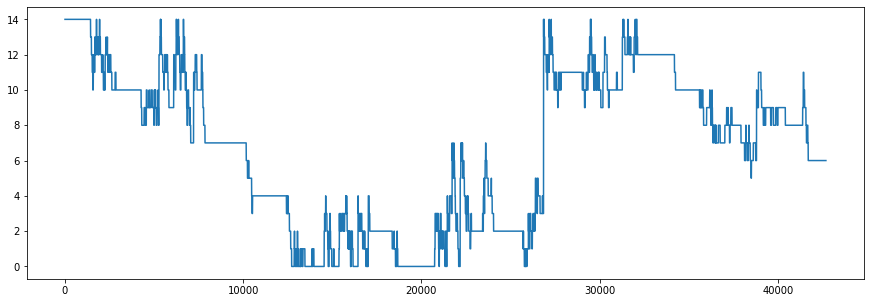

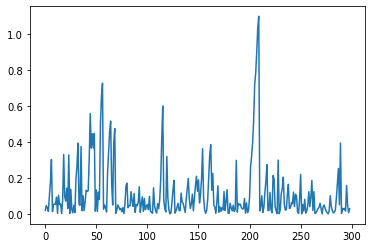

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()


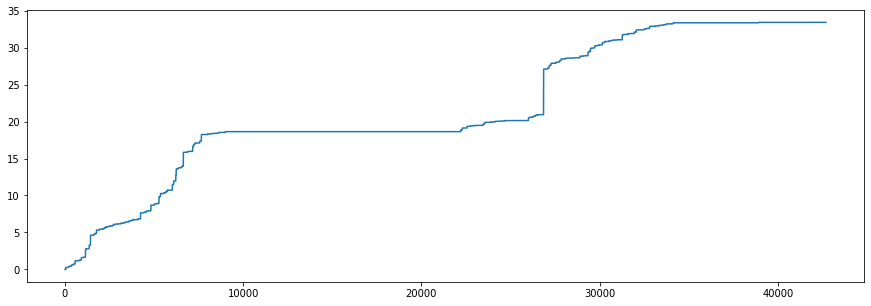

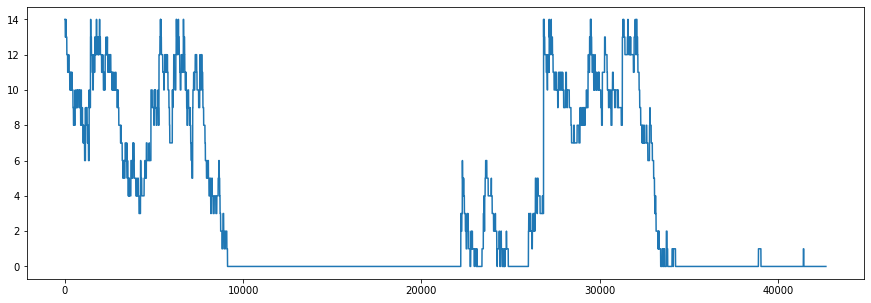

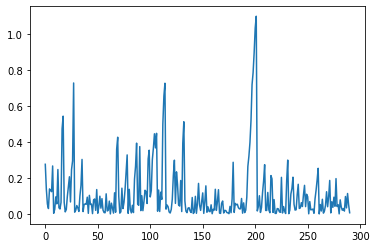

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TOTAL_PROFITS)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(allWall)
plt.show()
plt.plot(PROFITS["profit"])
plt.show()


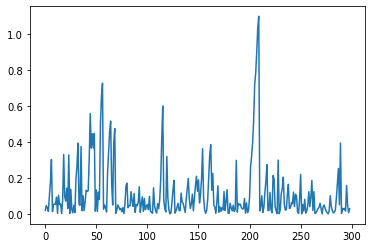

In [ ]:
MA_min=(5,8)
MA_15=(MA_min[0]*15,MA_min[1]*15)
MA_h=(MA_min[0]*60,MA_min[1]*60)
print(MA_min,MA_15,MA_h)

(5, 8) (75, 120) (300, 480)


[5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8,
 5,
 8]

In [ ]:
Data_hour=[]
Data_15mins=[]

In [ ]:
Data=[]

In [ ]:
print(allCoins[1])

In [ ]:
allCoins=["IOTXUSDT"]

In [ ]:
hystoricalData= client.get_historical_klines(symb,Client.KLINE_INTERVAL_1MINUTE,"12 hour ago UTC")

In [ ]:
hystDat=pd.DataFrame(hystoricalData,columns=["openTime","open","high","low","close","volume","closeTime","1","2","3","4","5"])

In [ ]:
hystFinal=hystDat.drop(columns=["1","2","3","4","5"])

In [ ]:
hystFinal["openTime"]=pd.to_datetime(hystFinal["openTime"]/1000,unit="s")

In [ ]:
hystFinal["closeTime"]=pd.to_datetime(hystFinal["closeTime"]/1000,unit="s")

In [ ]:
hystFinal

,openTime,open,high,low,close,volume,closeTime
0,2022-01-03 19:02:00,0.12317000,0.12321000,0.12308000,0.12308000,19822.00000000,2022-01-03 19:02:59.999000072
1,2022-01-03 19:03:00,0.12315000,0.12330000,0.12315000,0.12323000,136351.00000000,2022-01-03 19:03:59.999000072
2,2022-01-03 19:04:00,0.12325000,0.12327000,0.12321000,0.12325000,14259.00000000,2022-01-03 19:04:59.999000072
3,2022-01-03 19:05:00,0.12325000,0.12325000,0.12277000,0.12278000,120994.00000000,2022-01-03 19:05:59.999000072
4,2022-01-03 19:06:00,0.12280000,0.12289000,0.12276000,0.12288000,32546.00000000,2022-01-03 19:06:59.999000072
...,...,...,...,...,...,...,...
714,2022-01-04 06:56:00,0.12179000,0.12201000,0.12179000,0.12187000,37137.00000000,2022-01-04 06:56:59.999000072
715,2022-01-04 06:57:00,0.12187000,0.12187000,0.12180000,0.12185000,26091.00000000,2022-01-04 06:57:59.999000072
716,2022-01-04 06:58:00,0.12184000,0.12193000,0.12184000,0.12193000,12854.00000000,2022-01-04 06:58:59.999000072
717,2022-01-04 06:59:00,0.12184000,0.12184000,0.12171000,0.12183000,51124.00000000,2022-01-04 06:59:59.999000072


In [ ]:
from numpy.core import numeric
hystFinal[["open","close","high","low","volume"]]=hystFinal[["open","close","high","low","volume"]].apply(pd.to_numeric,axis=1)

In [ ]:
hystFinal.dtypes
hystFinal.describe()

,open,high,low,close,volume
count,719.000000,719.000000,719.000000,719.000000,7.190000e+02
mean,0.121862,0.121943,0.121776,0.121859,5.624136e+04
std,0.000804,0.000808,0.000810,0.000804,1.107499e+05
min,0.120140,0.120280,0.120000,0.120140,1.043000e+03
25%,0.121280,0.121340,0.121170,0.121280,1.413950e+04
50%,0.121690,0.121770,0.121610,0.121680,3.005700e+04
75%,0.122440,0.122560,0.122355,0.122420,5.922600e+04
max,0.124450,0.125390,0.123600,0.124500,1.873645e+06


**Visualization+**

In [ ]:
!pip install mplfinance

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [ ]:
import mplfinance as mpf

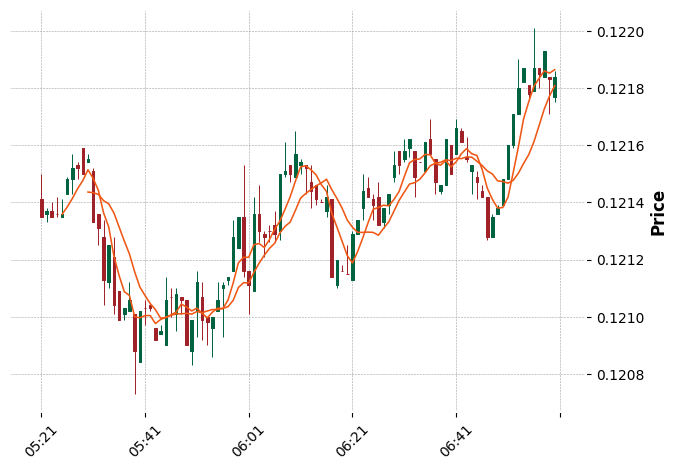

In [ ]:
from pandas.io.formats import style
mpf.plot(hystFinal.set_index("closeTime").tail(100),
         type="candle",style="charles",
         mav=(5,10)

)

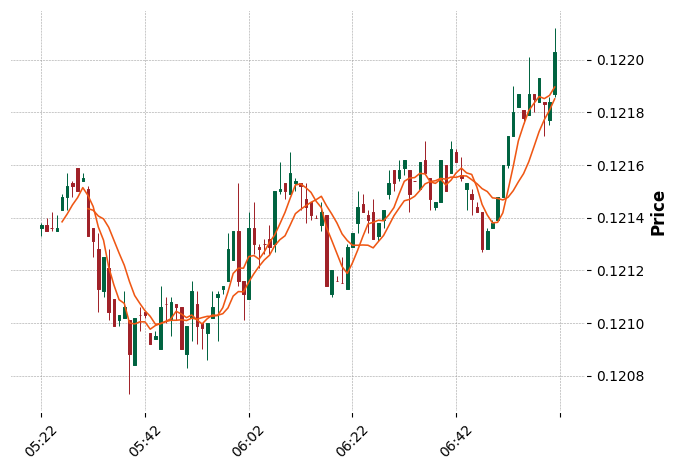

KeyboardInterrupt: ignored

In [ ]:
while True:
  hystoricalData= client.get_historical_klines(symb,Client.KLINE_INTERVAL_1MINUTE,"1 day ago UTC")
  hystDat=pd.DataFrame(hystoricalData,columns=["openTime","open","high","low","close","volume","closeTime","1","2","3","4","5"])
  hystFinal=hystDat.drop(columns=["1","2","3","4","5"])
  hystFinal["openTime"]=pd.to_datetime(hystFinal["openTime"]/1000,unit="s")
  hystFinal["closeTime"]=pd.to_datetime(hystFinal["closeTime"]/1000,unit="s")
  hystFinal[["open","close","high","low","volume"]]=hystFinal[["open","close","high","low","volume"]].apply(pd.to_numeric,axis=1)
  clear_output()
  mpf.plot(hystFinal.set_index("closeTime").tail(100),
         type="candle",style="charles",
         mav=(5,10)

)
  time.sleep(5)
  

## PREPARING DATA

In [ ]:
WALLET

In [ ]:
TOTAL_PROFIT

In [ ]:

bpoint=[]
spoint=[]

In [ ]:
##########
DATA=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
DATA_TEST=pd.DataFrame({"open":[],"wallcount":[],"outstandingLoss":[]})
(s,l)=(5,8)
##########
######
WALLET_CLEAR=0
######


#functions
def ema_gen(data,s1,s2):
  shortEMA =DATA["open"].ewm(span=s1,adjust=False).mean()
  longEMA =DATA["open"].ewm(span=s2,adjust=False).mean()
  return(shortEMA,longEMA)



for bs in range(0,int(DATA_SOURCE["open"].shape[0])):
  scale=2
  dat=DATA_SOURCE["open"][bs]  
  bspoint=[]
  ######################
  #COIN=client.get_ticker(symbol=symb)
  currentPrice=float(dat)
  #currentQuantity=math.floor((T_PRICE+5-TOKENS)/(currentPrice*tickSize))
  currentQuantity=math.floor((T_PRICE)/(currentPrice*tickSize))  
  #TIME=datetime.fromtimestamp(int(COIN.get('openTime'))/1000).strftime('%Y-%m-%d %H:%M:%S')
  ######################
  #Display dash board
  #print("##################### Current price ",currentPrice,"#######################")
  #print(currentPrice , "going to purchase",currentQuantity*currentPrice*tickSize)
  #print("Available tokens ",TOKENS)
  #print("Pending slots purchased price ")
  #print(WALLET)
  #print("All profitable deals")
  #print(PROFITS)
  #print("Total profit ",TOTAL_PROFIT)
  outStandingLoss=WALLET["orderUSD"].sum()-(WALLET["quantity"].sum()*currentPrice)
  DATA=DATA.append({"open":currentPrice,"wallcount":WALLET.shape[0],"outstandingLoss":outStandingLoss},ignore_index=True)
  #plt.plot(DATA["open"].tail(100))
 # plt.show()
 

  if DATA["open"].size>21:

    #data=something
    
   
    #pass indicator
    if int(DATA["open"].size)>21:
        
      (sEMA,lEMA)= ema_gen(DATA["open"][-20:],s,l)
      
      if (sEMA.iloc[-2]<lEMA.iloc[-2]) and (sEMA.iloc[-1]>lEMA.iloc[-1]) :  ############## BUYING POINT
        print("buying point####################################################")
        bpoint.append(int(bs))
   

      elif ((sEMA.iloc[-2]>lEMA.iloc[-2]) and (sEMA.iloc[-1]<lEMA.iloc[-1])) :   ############ SELLING POINT
        print("selling_point######################################################################################################++++++++++++++++")
        spoint.append(int(bs))
      

      
      #time.sleep(0.05)
      #clear_output()
  else:
    #print("getting data")
    print(currentPrice)
    #time.sleep(0.5) 
    #clear_output()

In [ ]:
(x,y)=(15000,15500)
DATA_SOURCE.plot(figsize = (18,8) ,marker="o",markevery=bpoint,mfc='green')
DATA_SOURCE.plot(figsize = (18,8) ,marker="o",markevery=spoint,mfc='red')
SUPRESS=DATA["open"].ewm(span=200,adjust=False).mean()
SUPRESS.plot(figsize = (18,8) )

In [ ]:
(sEMA,lEMA)= ema_gen(DATA_SOURCE["open"],5,8)

In [ ]:
xset=[]
yset=[]

In [ ]:
n=1
for b in bpoint:
  currentp=DATA_SOURCE["open"][b]
  tempset=[]
  for i in sEMA[b-2:b+2]:
    tempset.append((i-currentp)/currentp)
  for i in lEMA[b-2:b+2]:
    tempset.append((i-currentp)/currentp)
  tempset.append((SUPRESS[b]-currentp)/currentp)
  tempsety=((DATA_SOURCE["open"][spoint[n]]-currentp)/currentp)
  xset.append(tempset)
  yset.append(tempsety)
  print(currentp,DATA_SOURCE["open"][spoint[n]])
  n=n+1





In [ ]:
plt.figure(figsize = (18,8))
plt.plot(yset)
plt.show()
plt.figure(figsize = (18,8))
plt.plot(xset)

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
len(xset)

In [ ]:
(x_train,x_test,y_train,y_test)=(xset[0:900],xset[900:1275],yset[0:900],yset[900:1275])
(x_train,x_test,y_train,y_test)= (np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test))

In [ ]:
x_train.shape

In [ ]:
yset_new=np.array(yset)

In [ ]:
yset_new=yset_new*10000

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(yset_new)

In [ ]:
yset_new[15]

In [ ]:
out=pd.DataFrame(yset_new
                 ,columns=["y"])

In [ ]:
sns.boxplot(out["y"])

In [ ]:
out["y"]=(out["y"]-min(out["y"]))/(max(out["y"])-min(out["y"]))

In [ ]:
sns.boxplot(out["y"])

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [ ]:
out["y"]

In [ ]:
fiteedy=scaler.fit_transform(out[["y"]])

In [ ]:
out1=pd.DataFrame(fiteedy,columns=["y"])

In [ ]:
sns.boxplot(out1["y"])

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(out1)
plt.figure(figsize = (18,8))
plt.plot(yset_new)

In [ ]:
sns.displot(out1)

In [ ]:
 out1

In [ ]:
in1=pd.DataFrame(xset)

In [ ]:
xset_=in1
yset_=out1

In [ ]:
(x_train,x_test,y_train,y_test)=(xset_[0:900],xset_[900:1275],yset_[0:900],yset_[900:1275])
(x_train,x_test,y_train,y_test)= (np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test))

## MODELTRAINING

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import keras
import tensorflow as tf
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
x_train.shape

In [ ]:
out1["y"]

In [ ]:
corr=xset_.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()


model.fit(x_train,y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)

In [ ]:
pred=model.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred)*10000)

In [ ]:
model.score(x_test, y_test)

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(pred3[200:255],marker="o",markevery=1, color="red")
plt.plot(y_test[200:255],marker="o",markevery=1,color="green")
plt.axhline()

In [ ]:
y_test